## Headers

### Package Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./sig_sample_features/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filepath = './Updated signal features/npz files/'
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./sig_sample_features/LeptonP.npz
./sig_sample_features/WmBoson.npz
./sig_sample_features/LpNu.npz
./sig_sample_features/WpBoson.npz
./sig_sample_features/MET.npz
./sig_sample_features/CGLMP.npz
./sig_sample_features/LeadLepton.npz
./sig_sample_features/LmNu.npz
./sig_sample_features/diNuPz_est.npy
./sig_sample_features/Higgs.npz
./sig_sample_features/subLeadLepton.npz
./sig_sample_features/xi_xyz.npz
./sig_sample_features/LeptonM.npz
./sig_sample_features/diLepton.npz


In [2]:
file = np.load(filepath+'MET.npz')
file.files

['pt', 'px', 'py', 'phi']

In [3]:
def vec_unit(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return x/r, y/r, z/r
vvec_unit = np.vectorize(vec_unit)

def vec_mag(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)
vvec_mag = np.vectorize(vec_mag)

def vec_cos(ax, ay, az, bx, by, bz):
    ra = np.sqrt(ax**2 + ay**2 + az**2)
    rb = np.sqrt(bx**2 + by**2 + bz**2)
    return (ax*bx + ay*by + az*bz)/(ra*rb)
vvec_cos = np.vectorize(vec_cos)

def inv_mass(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return np.sqrt(E**2 - P2)
vinv_mass = np.vectorize(inv_mass)

def inv_mass_2(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return (E**2 - P2)
vinv_mass_2 = np.vectorize(inv_mass_2)



In [4]:
# DataFrame.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)
def load_evt(file, label, index):
    f = np.load(filepath+file)
    if index == None:
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', f[label].shape[0])
        return f[label]
    else:
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', f[label].shape[0]-len(index))
        return np.delete(f[label], index)
def load_p4(file,labels,index):
    labels = ['E','px','py','pz'] if labels == None else labels
    DF = pd.DataFrame(columns= labels)
    f = np.load(filepath+file)
    DF[labels[0]] = f['E' ]
    DF[labels[1]] = f['px']
    DF[labels[2]] = f['py']
    DF[labels[3]] = f['pz']
    if index == None:
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', DF.iloc[:,0].shape[0])
        return DF
    else:
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', DF.iloc[:,0].shape[0]-len(index))
        return DF.drop(rmv_evt, axis=0).reset_index(drop=True)
    

In [5]:
PNeutrino = load_p4('LpNu.npz',None,None)
MNeutrino = load_p4('LmNu.npz',None,None)

Loaded E, px, py, pz from LpNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E, px, py, pz from LmNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862


In [6]:
anomalies = np.where(vec_mag(PNeutrino['px']+MNeutrino['px'],
                             PNeutrino['py']+MNeutrino['py'],
                             PNeutrino['pz']+MNeutrino['pz']) > PNeutrino['E']+MNeutrino['E'],
                     PNeutrino['E']+MNeutrino['E'] - 
                     vec_mag(PNeutrino['px']+MNeutrino['px'],
                             PNeutrino['py']+MNeutrino['py'],
                             PNeutrino['pz']+MNeutrino['pz']),0)# Check cases where E**2 - p**2 < 0
# rare cases when E**2 - p**2 < 0 , drop these events for now , results show 3 out of ~2447970~ *2928862* events
rmv_evt = []
for i, j in enumerate(anomalies):
    if j != 0:
        rmv_evt.append(i)
        print(i, anomalies[i])
print(rmv_evt)

160710 -3.990798722952604e-05
759038 -0.0668950080871582
1396059 -0.006271482794545591
[160710, 759038, 1396059]


In [8]:
GeV = 0.001
PNeutrino = load_p4('LpNu.npz',None,rmv_evt)*GeV
MNeutrino = load_p4('LmNu.npz',None,rmv_evt)*GeV
diNeutrino = PNeutrino + MNeutrino
diNeutrino['m'] = vinv_mass(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
PNeutrino['m'] = load_evt('LpNu.npz','m',rmv_evt)
MNeutrino['m'] = load_evt('LmNu.npz','m',rmv_evt)

Loaded E, px, py, pz from LpNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded E, px, py, pz from LmNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded m from LpNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded m from LmNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859


In [9]:
diNeutrino.describe()

E            px            py            pz             m
count  2.928859e+06  2.928859e+06  2.928859e+06  2.928859e+06  2.928859e+06
mean   1.737244e+02  5.345300e-03  8.138171e-03  2.294534e-01  3.358438e+01
std    2.127287e+02  3.684833e+01  3.682345e+01  2.666830e+02  2.172876e+01
min    1.582629e-01 -7.122409e+02 -1.012706e+03 -4.023908e+03  1.265130e-03
25%    6.514861e+01 -2.437555e+01 -2.431213e+01 -7.461678e+01  1.957780e+01
50%    1.002624e+02  6.895508e-03  3.651367e-03  1.228228e-01  3.181856e+01
75%    1.924494e+02  2.435145e+01  2.433903e+01  7.514292e+01  4.494666e+01
max    4.389521e+03  7.917826e+02  8.692037e+02  4.389388e+03  2.019120e+03

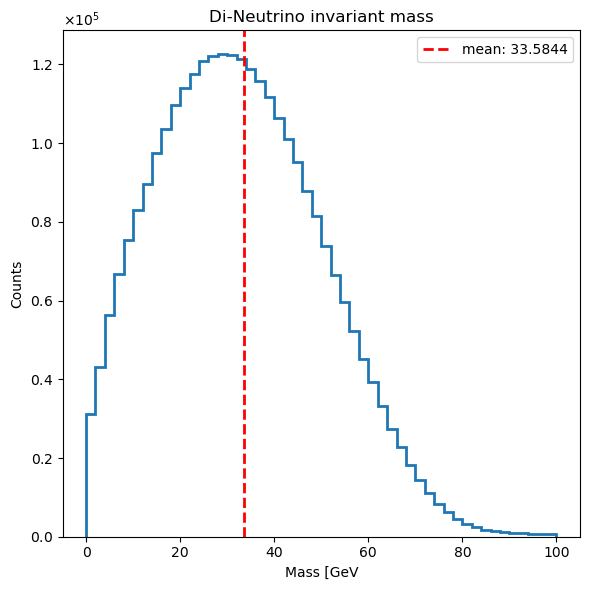

In [10]:
fig = plt.figure(figsize=(6,6))
plt.title('Di-Neutrino invariant mass')
plt.xlabel('Mass [GeV]')
plt.ylabel('Counts')
plt.hist(diNeutrino['m'],histtype='step',bins=50,range=[0,100],lw=2)
plt.axvline(np.mean(diNeutrino['m']),ls='dashed',lw=2, label = f'mean: {"%.4f"% np.mean(diNeutrino["m"])}',c='r')
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.legend()
plt.tight_layout()

## Momentum

### Data import:
$\pm$ lepton $(p_x,p_y,p_z)$

In [11]:
GeV = 0.001
#rmv_evt = [638488,835579,2168342]
#rmv_evt = [160710, 759038, 1396059]
PLepton = load_p4('LeptonP.npz',['lep_p_E','lep_p_px','lep_p_py','lep_p_pz'], rmv_evt)*GeV
MLepton = load_p4('LeptonM.npz',['lep_m_E','lep_m_px','lep_m_py','lep_m_pz'], rmv_evt)*GeV
lep_mom = pd.concat([PLepton,MLepton], axis=1)
del(PLepton,MLepton)

Loaded E, px, py, pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded E, px, py, pz from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859


In [6]:
lep_mom

lep_p_E   lep_p_px   lep_p_py    lep_p_pz     lep_m_E   lep_m_px  \
0         19.465703  -5.065763  16.360542   -9.250574   12.031222  11.081455   
1        131.817141   8.901175   2.966260  131.482766   66.401992 -13.096559   
2         94.193734  -3.040100  49.431305   80.123430   26.267500   7.589698   
3        165.226891   4.702402 -19.638676  163.988219   36.290188   0.038865   
4          6.403636   5.808921  -2.135702   -1.643704   32.603137  11.729594   
...             ...        ...        ...         ...         ...        ...   
2928854   22.480516  -4.717555 -16.589703   14.418352   49.250797 -12.090704   
2928855   99.478336 -39.512535 -10.980121   90.631805  122.645922 -10.679896   
2928856  146.673859  -4.429424 -31.802176  143.116078   91.911164 -18.621098   
2928857   93.748234  50.839535 -12.679508   77.738687   75.333094  13.880692   
2928858   17.937865   0.558829  16.618240   -6.728869   31.940250  12.075938   

          lep_m_py    lep_m_pz  
0         2.673936   -3.847299  
1        14.755815   63.403242  
2         1.677931   25.090863  
3        20.284725   30.091441  
4        30.418752    0.263776  
...            ...         ...  
2928854   9.565715   46.775559  
2928855  15.682068  121.169445  
2928856 -13.887292   88.927273  
2928857   9.671063   73.408859  
2928858  17.681641  -23.700439  

[2928859 rows x 8 columns]

### Data import: leading lepton (Transverse Momentum, Energy)

In [12]:
lep_mom["lep_p_pt"] = load_evt('LeptonP.npz', 'pt', rmv_evt)*GeV
lep_mom["lep_m_pt"] = load_evt('LeptonM.npz', 'pt', rmv_evt)*GeV
lep_mom["lead_lep_pt"] = load_evt('LeadLepton.npz', 'pt', rmv_evt)*GeV
lep_mom["lead_lep_E"] =  load_evt('LeadLepton.npz', 'E', rmv_evt)*GeV

Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded pt from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded pt from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded E from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859


In [13]:
lep_mom.head(10)

lep_p_E   lep_p_px   lep_p_py    lep_p_pz     lep_m_E   lep_m_px  \
0   19.465703  -5.065763  16.360542   -9.250574   12.031222  11.081455   
1  131.817141   8.901175   2.966260  131.482766   66.401992 -13.096559   
2   94.193734  -3.040100  49.431305   80.123430   26.267500   7.589698   
3  165.226891   4.702402 -19.638676  163.988219   36.290188   0.038865   
4    6.403636   5.808921  -2.135702   -1.643704   32.603137  11.729594   
5   16.188201   3.912532  15.213610    3.909582   19.412955 -15.947188   
6   16.548684 -12.487793  -5.505414   -9.359125   41.055750 -18.392381   
7   19.500895  -4.561588  18.924410   -1.154271   43.361348  42.407754   
8   16.361694 -13.973932  -0.782891    8.474089  166.999484 -10.592347   
9  164.814766  34.397141   2.031300 -161.172625   70.592648  29.001777   

    lep_m_py    lep_m_pz   lep_p_pt   lep_m_pt  lead_lep_pt  lead_lep_E  
0   2.673936   -3.847299  17.126859  11.399499    17.126859   19.465703  
1  14.755815   63.403242   9.382410  19.729519    19.729519   66.401992  
2   1.677931   25.090863  49.524702   7.772964    49.524702   94.193734  
3  20.284725   30.091441  20.193815  20.284762    20.284762   36.290188  
4  30.418752    0.263776   6.189086  32.601899    32.601899   32.603137  
5   0.491028   11.059336  15.708655  15.954745    15.954745   19.412955  
6  36.258582   -5.710545  13.647511  40.656665    40.656665   41.055750  
7  -4.632000    7.767462  19.466417  42.659970    42.659970   43.361348  
8 -35.282555  162.885766  13.995845  36.838247    36.838247  166.999484  
9   1.896990  -64.332027  34.457067  29.063752    34.457067  164.814766

### Consistency check on leading pT lepton and (ID'ed) decay product matching

#### Transverse momentum

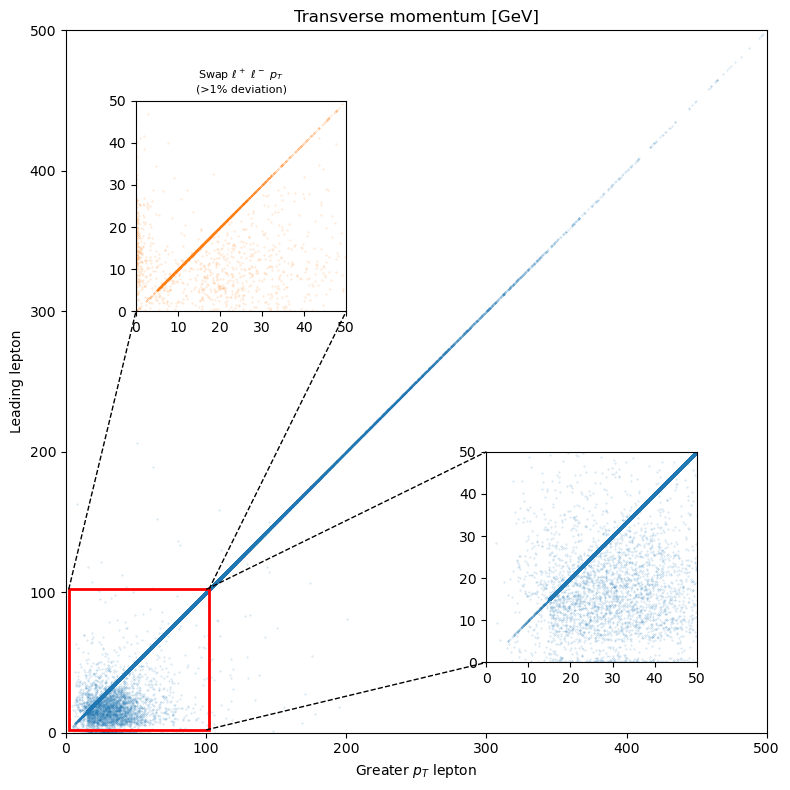

In [14]:
#highest transverse momentum lepton in the event, referred to as the leading lepton
fig, ax = plt.subplots(figsize=(8,8))
greater_pT_lep = np.where(lep_mom['lep_p_pt']>lep_mom['lep_m_pt'], lep_mom['lep_p_pt'], lep_mom['lep_m_pt'])
ax.set_xlim([0,500])
ax.set_ylim([0,500])
ax.scatter(greater_pT_lep, lep_mom['lead_lep_pt'], s=0.1, alpha=0.3)
ax.set_xlabel(r"Greater $p_T$ lepton")
ax.set_ylabel(r"Leading lepton")
ax.set_title(r"Transverse momentum [GeV]")
ax.add_patch(Rectangle((2,2), 100, 100, lw=2,edgecolor='red', facecolor='none'))
ax.plot([100, 300], [102, 200], ls='dashed', c='k', lw = 1)
ax.plot([100, 300], [  2,  50], ls='dashed', c='k', lw = 1)
ax1 = ax.inset_axes([0.6,0.1,0.3,0.3])
ax1.set_xlim([0,50])
ax1.set_ylim([0,50])
ax1.scatter(greater_pT_lep, lep_mom['lead_lep_pt'], s=0.1, alpha=0.3)

pT_greater = np.where(np.abs((greater_pT_lep - lep_mom['lead_lep_pt'])/lep_mom['lead_lep_pt']) < 0.01, False, True)
x1 = lep_mom['lead_lep_pt'][pT_greater]
x2 = np.where(lep_mom['lep_p_pt'][pT_greater]>lep_mom['lep_m_pt'][pT_greater], lep_mom['lep_m_pt'][pT_greater], lep_mom['lep_p_pt'][pT_greater])
ax2 = ax.inset_axes([0.1,0.6,0.3,0.3])
ax2.scatter(x1,x2, s=0.1, alpha=0.3, c='C1')
ax2.set_xlim([0,50])
ax2.set_ylim([0,50])
ax2.set_title(r"Swap $\ell^+$ $\ell^-$ $p_T$"+"\n(>1% deviation)",fontsize=8)
ax.plot([  2,  50], [102, 300], ls='dashed', c='k', lw = 1)
ax.plot([102, 200], [102, 300], ls='dashed', c='k', lw = 1)
plt.tight_layout()
plt.savefig('lead_lep_consistency.png')

#### Energy

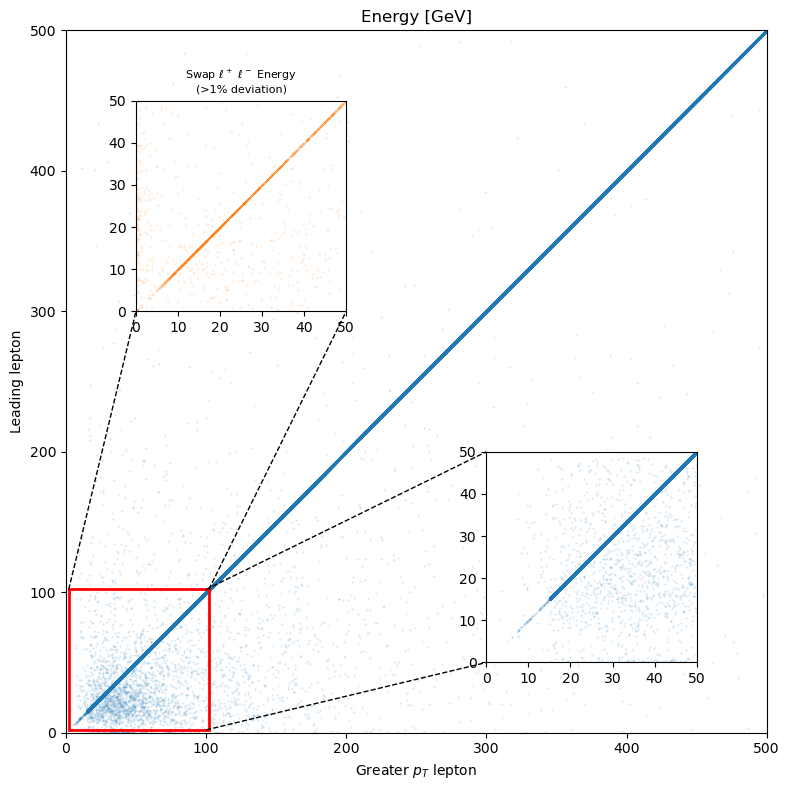

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
greater_pT_lep = np.where(lep_mom['lep_p_pt']>lep_mom['lep_m_pt'], lep_mom['lep_p_pt'], lep_mom['lep_m_pt'])
greater_pT_lep_E = np.where(lep_mom['lep_p_pt']>lep_mom['lep_m_pt'], lep_mom['lep_p_E'], lep_mom['lep_m_E'])
ax.set_xlim([0,500])
ax.set_ylim([0,500])
ax.scatter(greater_pT_lep_E, lep_mom['lead_lep_E'], s=0.1, alpha=0.3)
ax.set_xlabel(r"Greater $p_T$ lepton")
ax.set_ylabel(r"Leading lepton")
ax.set_title(r"Energy [GeV]")
ax.add_patch(Rectangle((2,2), 100, 100, lw=2,edgecolor='red', facecolor='none'))
ax.plot([100, 300], [102, 200], ls='dashed', c='k', lw = 1)
ax.plot([100, 300], [  2,  50], ls='dashed', c='k', lw = 1)
ax1 = ax.inset_axes([0.6,0.1,0.3,0.3])
ax1.set_xlim([0,50])
ax1.set_ylim([0,50])
ax1.scatter(greater_pT_lep_E, lep_mom['lead_lep_E'], s=0.1, alpha=0.3)

pT_greater = np.where(np.abs((greater_pT_lep - lep_mom['lead_lep_pt'])/lep_mom['lead_lep_pt']) < 0.01, False, True)
x1 = lep_mom['lead_lep_E'][pT_greater]
x2 = np.where(lep_mom['lep_p_pt'][pT_greater]>lep_mom['lep_m_pt'][pT_greater], lep_mom['lep_m_E'][pT_greater], lep_mom['lep_p_E'][pT_greater])
ax2 = ax.inset_axes([0.1,0.6,0.3,0.3])
ax2.scatter(x1,x2, s=0.1, alpha=0.3, c='C1')
ax2.set_xlim([0,50])
ax2.set_ylim([0,50])
ax2.set_title(r"Swap $\ell^+$ $\ell^-$ Energy"+"\n(>1% deviation)",fontsize=8)
ax.plot([  2,  50], [102, 300], ls='dashed', c='k', lw = 1)
ax.plot([102, 200], [102, 300], ls='dashed', c='k', lw = 1)
plt.tight_layout()
plt.savefig('lead_lep_consistency_E.png')

### Distribution of lab frame lepton momentum

#### Positively charged lepton

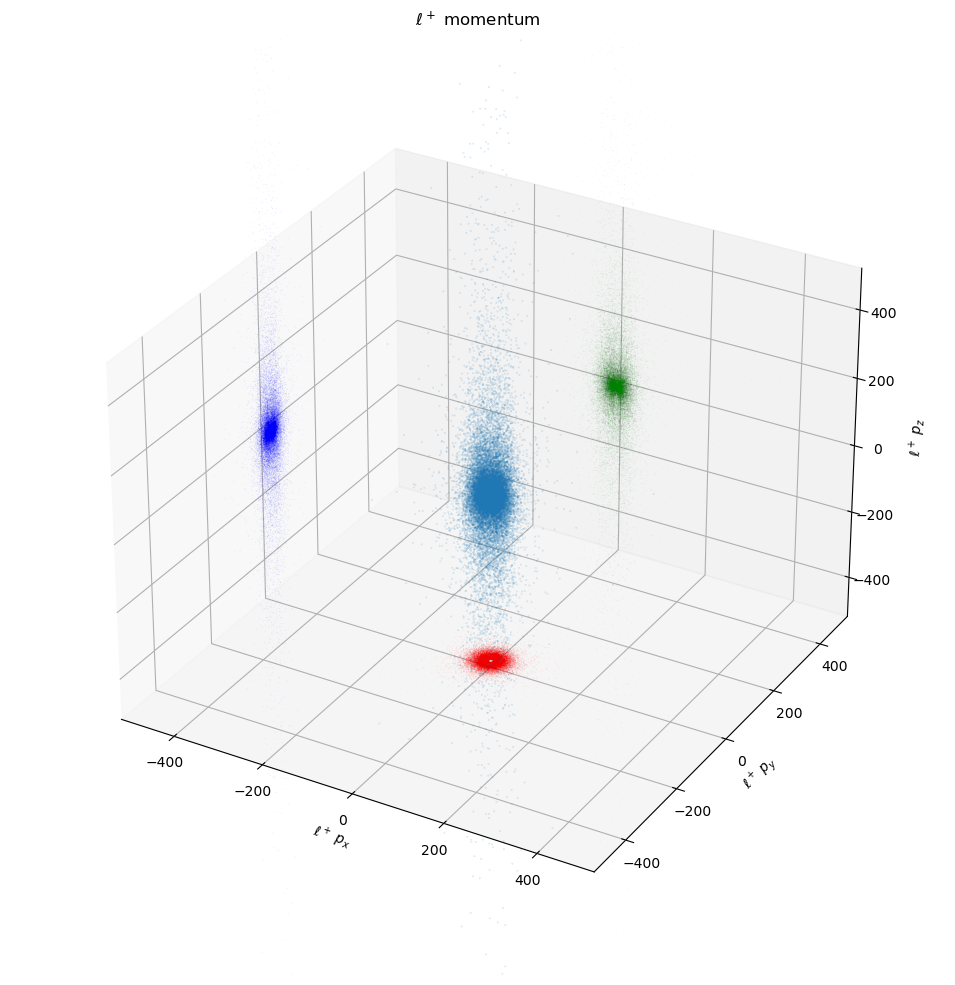

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), subplot_kw={'projection': '3d'})
plt.suptitle(r"$\ell^+$ momentum")
points = np.random.choice(np.arange(0,len(lep_mom["lep_p_pz"]),1), 25000, replace=False)
limits = 500
ax.set_proj_type('persp')#, focal_length=0.2)
ax.scatter(lep_mom["lep_p_px"][points],
           lep_mom["lep_p_py"][points],
           lep_mom["lep_p_pz"][points],
           s=0.05, alpha=0.3)
ax.set_xlabel(r"$\ell^+\:p_x$")
ax.set_ylabel(r"$\ell^+\:p_y$")
ax.set_zlabel(r"$\ell^+\:p_z$", labelpad=10)
ax.plot(lep_mom["lep_p_px"][points], lep_mom["lep_p_py"][points], 'r+', zdir='z', zs=-limits, markersize=0.05, alpha=0.3)
ax.plot(lep_mom["lep_p_px"][points], lep_mom["lep_p_pz"][points], 'g+', zdir='y', zs= limits, markersize=0.05, alpha=0.3)
ax.plot(lep_mom["lep_p_py"][points], lep_mom["lep_p_pz"][points], 'b+', zdir='x', zs=-limits, markersize=0.05, alpha=0.3)
ax.set_xlim3d(-limits, limits)
ax.set_ylim3d(-limits, limits)
ax.set_zlim3d(-limits, limits)
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.tight_layout()

#### Negatively charged lepton

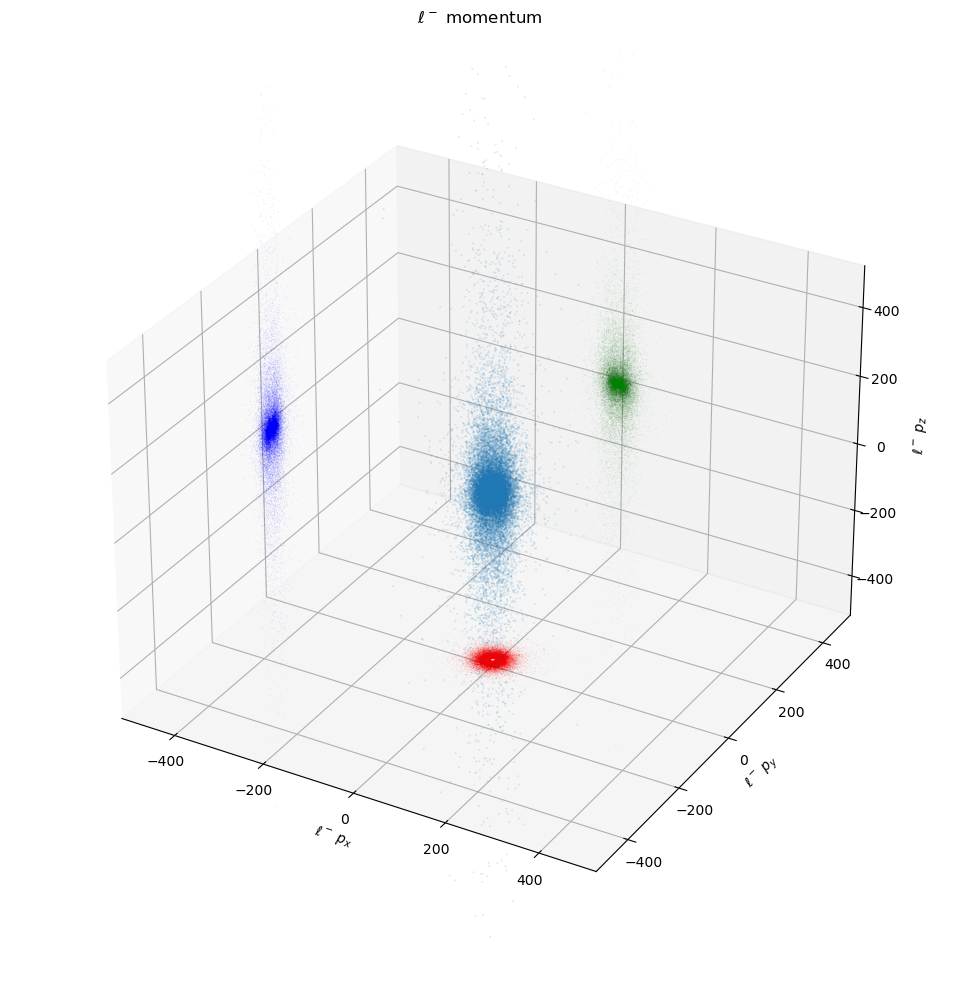

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), subplot_kw={'projection': '3d'})
plt.suptitle(r"$\ell^-$ momentum")
points = np.random.choice(np.arange(0,len(lep_mom["lep_m_pz"]),1), 25000, replace=False)
limits = 500
ax.set_proj_type('persp')#, focal_length=0.2)
ax.scatter(lep_mom["lep_m_px"][points],
           lep_mom["lep_m_py"][points],
           lep_mom["lep_m_pz"][points],
           s=0.05, alpha=0.3)
ax.set_xlabel(r"$\ell^-\:p_x$")
ax.set_ylabel(r"$\ell^-\:p_y$")
ax.set_zlabel(r"$\ell^-\:p_z$", labelpad=10)
ax.plot(lep_mom["lep_m_px"][points], lep_mom["lep_m_py"][points], 'r+', zdir='z', zs=-limits, markersize=0.05, alpha=0.3)
ax.plot(lep_mom["lep_m_px"][points], lep_mom["lep_m_pz"][points], 'g+', zdir='y', zs= limits, markersize=0.05, alpha=0.3)
ax.plot(lep_mom["lep_m_py"][points], lep_mom["lep_m_pz"][points], 'b+', zdir='x', zs=-limits, markersize=0.05, alpha=0.3)
ax.set_xlim3d(-limits, limits)
ax.set_ylim3d(-limits, limits)
ax.set_zlim3d(-limits, limits)
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.tight_layout()

#### Correlation between (lab frame) lepton momentum components

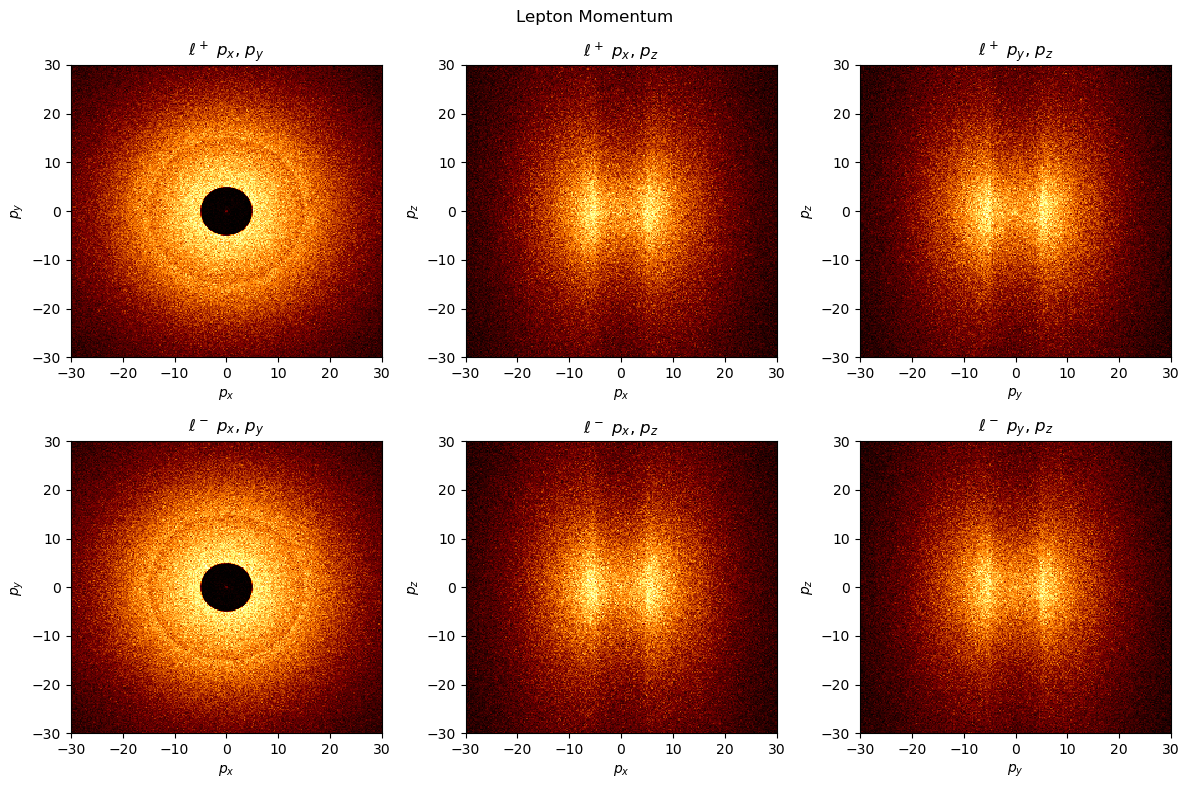

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
plt.suptitle("Lepton Momentum")
comp = [r"$p_x$", r"$p_y$", r"$p_z$"]
lep_p_mom = [lep_mom['lep_p_px'], lep_mom['lep_p_py'], lep_mom['lep_p_pz']]
lep_m_mom = [lep_mom['lep_m_px'], lep_mom['lep_m_py'], lep_mom['lep_m_pz']]
ax_x = [0,0,1]
ax_y = [1,2,2]
for i in range(3):
    ax[0,i].hist2d(lep_p_mom[ax_x[i]], lep_p_mom[ax_y[i]], bins=250, range=[[-30,30],[-30,30]], cmap='afmhot')
    ax[0,i].set_title(r"$\ell^+$ "+f"{comp[ax_x[i]]}, {comp[ax_y[i]]}")
    ax[0,i].set_ylabel(f"{comp[ax_y[i]]}")
    ax[0,i].set_xlabel(f"{comp[ax_x[i]]}")
    ax[1,i].hist2d(lep_m_mom[ax_x[i]], lep_m_mom[ax_y[i]], bins=250, range=[[-30,30],[-30,30]], cmap='afmhot')
    ax[1,i].set_title(r"$\ell^-$ "+f"{comp[ax_x[i]]}, {comp[ax_y[i]]}")
    ax[1,i].set_ylabel(f"{comp[ax_y[i]]}")
    ax[1,i].set_xlabel(f"{comp[ax_x[i]]}")
plt.tight_layout()
#plt.savefig("lep_mom_dist.png")
del(lep_p_mom, lep_m_mom)

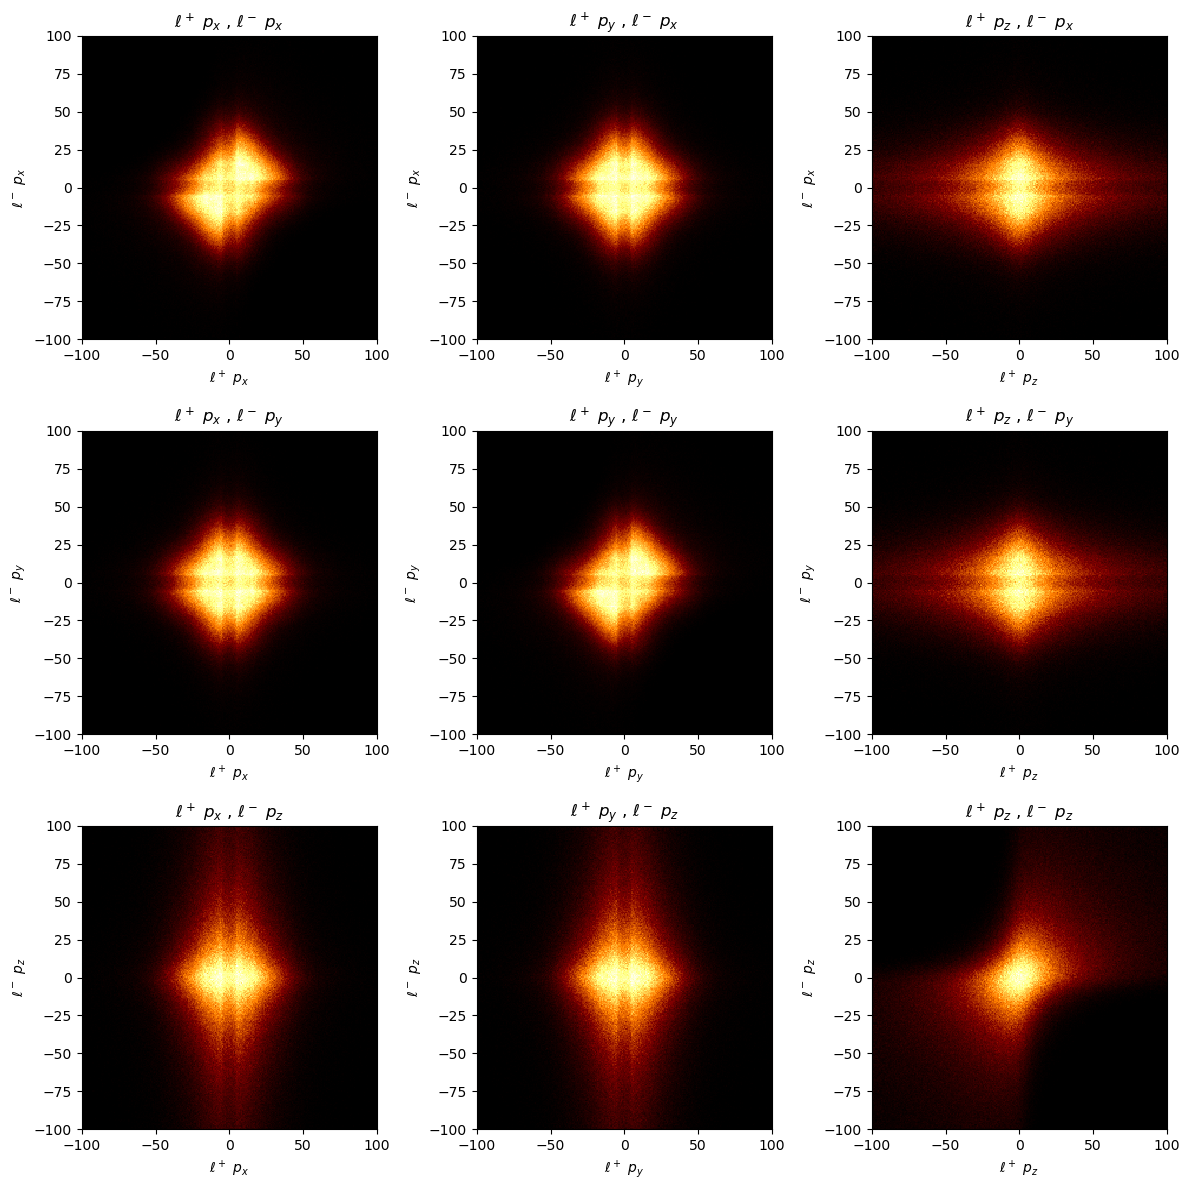

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
#plt.suptitle("Lepton Momentum")
comp = [r"$p_x$", r"$p_y$", r"$p_z$"]
lep_p_mom = [lep_mom['lep_p_px'], lep_mom['lep_p_py'], lep_mom['lep_p_pz']]
lep_m_mom = [lep_mom['lep_m_px'], lep_mom['lep_m_py'], lep_mom['lep_m_pz']]
#for i in range():
for i in range(3):
    for j in range(3):
#'''
        ax[i,j].set_title(r"$\ell^+$ " + f"{comp[j]}" + r" , $\ell^-$ " + f"{comp[i]}")
        ax[i,j].hist2d(lep_p_mom[j], lep_m_mom[i], bins=250, range=[[-100,100],[-100,100]], cmap='afmhot')
        ax[i,j].set_ylabel(r"$\ell^-$ " + f"{comp[i]}")
        ax[i,j].set_xlabel(r"$\ell^+$ " + f"{comp[j]}")
#'''
plt.tight_layout()
del(lep_p_mom, lep_m_mom)
#plt.savefig("lep_mom_dist.png")
#del(lep_p_mom, lep_m_mom)

### Higgs momentum

In [21]:
Higgs = pd.DataFrame()
Higgs = load_p4('Higgs.npz',None,rmv_evt)*GeV
Higgs["pt" ] = load_evt('Higgs.npz', 'pt', rmv_evt)*GeV
Higgs["eta"] = load_evt('Higgs.npz', 'eta', rmv_evt)
Higgs["phi"] = load_evt('Higgs.npz', 'phi', rmv_evt)

Loaded E, px, py, pz from Higgs.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded pt from Higgs.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded eta from Higgs.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded phi from Higgs.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859


In [22]:
Higgs.head(10)

E          px         py          pz          pt       eta  \
0  173.525031   22.355744  94.442336   71.181352   97.052224  0.679841   
1  809.251188  138.636203 -18.513561  787.209938  139.866897  2.428751   
2  195.176469    0.430970  -1.640548  149.878000    1.696212  5.174604   
3  242.614953  -15.095323 -16.602137  206.720656   22.438800  2.916657   
4  193.672906   -4.100197   1.499863  147.873406    4.365914  4.215894   
5  349.887438   -4.093890  -2.574630  326.763469    4.836182  4.906313   
6  136.814188   22.046328 -11.828873  -49.666863   25.019249 -1.436973   
7  218.151000  135.996406  61.190184  -98.620063  149.128338 -0.620683   
8  499.881594    1.012385  -7.744144  483.938594    7.810037  4.819761   
9  422.501094   36.407453 -66.955531 -396.323625   76.213816 -2.350955   

        phi  
0  1.338361  
1 -0.132755  
2 -1.313902  
3 -2.308693  
4  2.790910  
5 -2.580197  
6 -0.492455  
7  0.422804  
8 -1.440804  
9 -1.072760

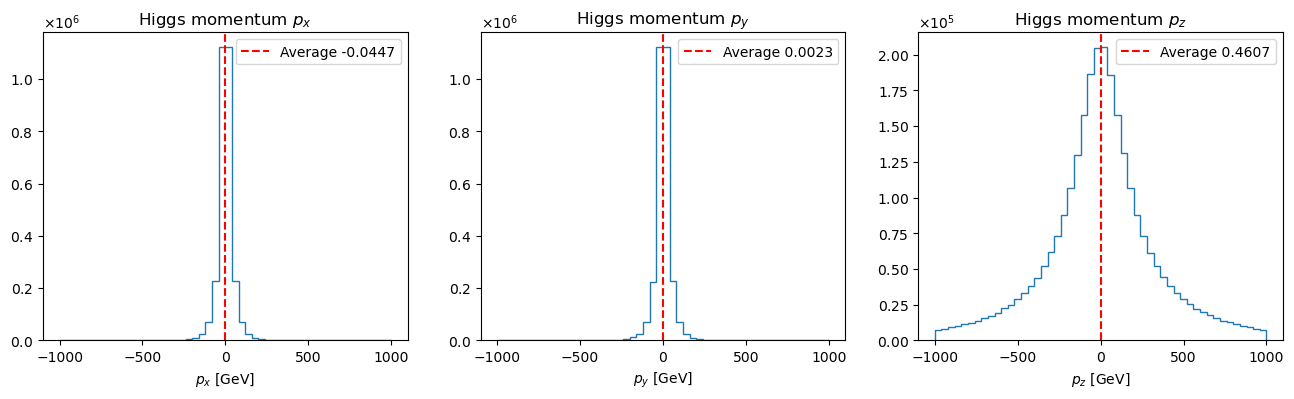

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
ax = ax.flatten()
ax_x = [r"$p_x$", r"$p_y$", r"$p_z$"]
for i, j in enumerate(["px", "py", "pz"]):
    ax[i].hist(Higgs[j], bins=50, range=[-1000,1000], histtype='step')
    ax[i].set_xlabel(f"{ax_x[i]} [GeV]")
    avg = np.mean(Higgs[j])
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].axvline(np.mean(Higgs[j]), ls='dashed', c='r', label="Average {:.4f}".format(np.mean(Higgs[j])))
    ax[i].set_title(f"Higgs momentum {ax_x[i]}")
    ax[i].legend()

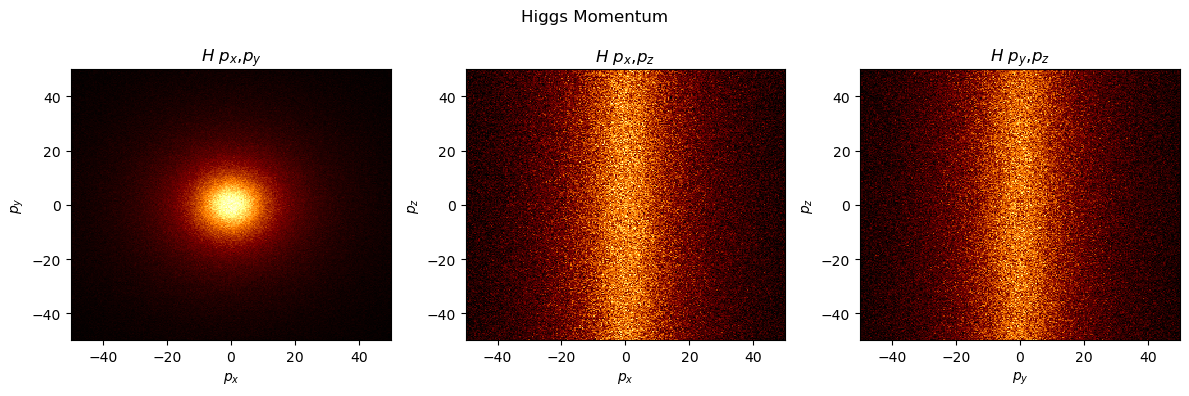

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax = ax.flatten()
plt.suptitle("Higgs Momentum")
comp = [r"$p_x$", r"$p_y$", r"$p_z$"]
higgs = [Higgs['px'], Higgs['py'], Higgs['pz']]
ax_x = [0,0,1]
ax_y = [1,2,2]
for i in range(3):
    ax[i].set_title(r"$H$ " + f"{comp[ax_x[i]]},{comp[ax_y[i]]}")
    ax[i].hist2d(higgs[ax_x[i]], higgs[ax_y[i]], bins=250, range=[[-50,50],[-50,50]], cmap='afmhot')
    ax[i].set_ylabel(comp[ax_y[i]])
    ax[i].set_xlabel(comp[ax_x[i]])
plt.tight_layout()
plt.savefig("Higgs_momentum.png")

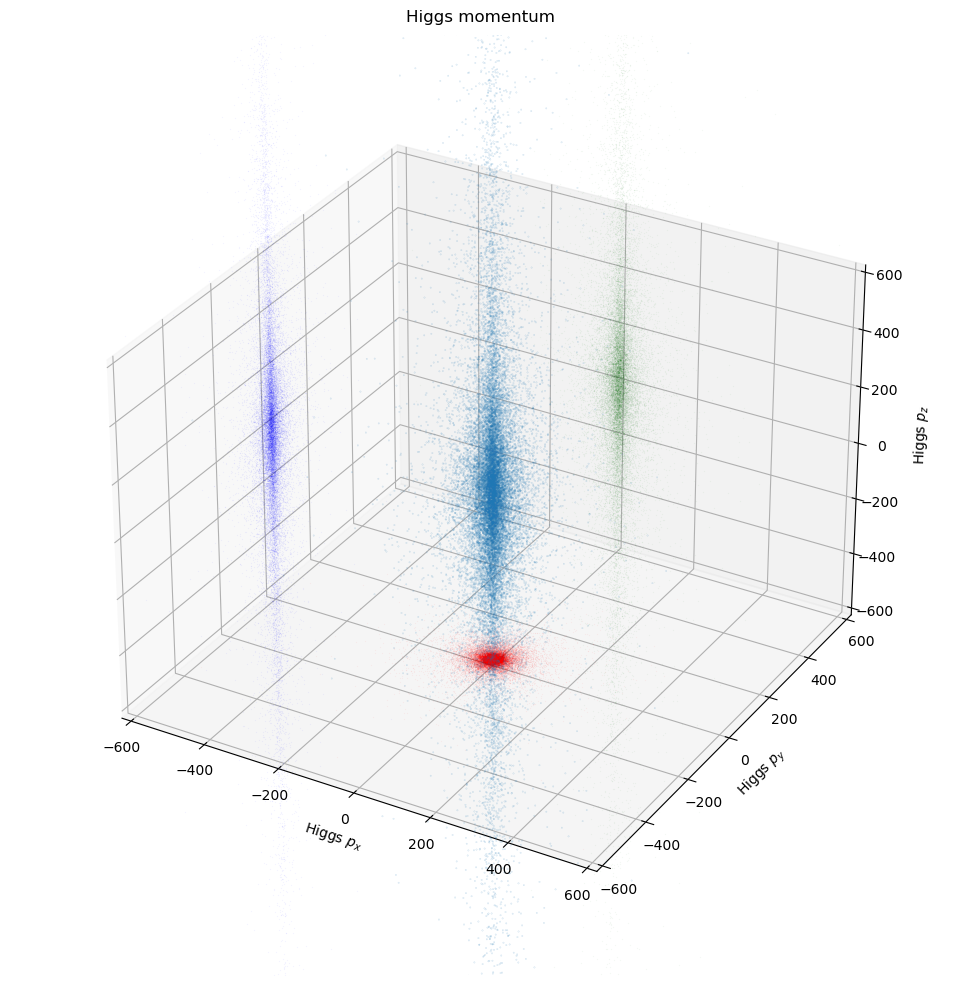

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), subplot_kw={'projection': '3d'})
plt.suptitle("Higgs momentum")
points = np.random.choice(np.arange(0,len(Higgs["px"]),1), 25000, replace=False)
limits = 600
ax.set_proj_type('persp')#, focal_length=0.2)
ax.scatter(Higgs["px"][points],
           Higgs["py"][points],
           Higgs["pz"][points],
           s=0.05, alpha=0.3)
ax.set_xlabel(r"Higgs $p_x$")
ax.set_ylabel(r"Higgs $p_y$")
ax.set_zlabel(r"Higgs $p_z$", labelpad=10)
ax.plot(Higgs["px"][points], Higgs["py"][points], 'r+', zdir='z', zs=-limits, markersize=0.05, alpha=0.3)
ax.plot(Higgs["px"][points], Higgs["pz"][points], 'g+', zdir='y', zs= limits, markersize=0.05, alpha=0.3)
ax.plot(Higgs["py"][points], Higgs["pz"][points], 'b+', zdir='x', zs=-limits, markersize=0.05, alpha=0.3)
ax.set_xlim3d(-limits, limits)
ax.set_ylim3d(-limits, limits)
ax.set_zlim3d(-limits, limits)
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.tight_layout()

## The CGLMP expectation value:

\begin{align*}
\mathrm{tr}(\rho \mathcal{B}_\text{CGLMP}^{xy})
\frac{8}{ \sqrt{3} } & \langle \xi_x^+\xi_x^- + \xi_x^+\xi_x^- \rangle \\
+ 25 & \langle [{\xi_x^+}^2 - {\xi_y^+}^2][{\xi_x^-}^2 - {\xi_y^-}^2] \rangle \\
+ 100 & \langle \xi_x^+ \xi_y^+ \xi_x^- \xi_y^- \rangle
\end{align*}
\begin{equation*}
\mathcal{I}_3 = \mathrm{max}(
\langle \mathcal{B}_\text{CGLMP}^{xy} \rangle,
\langle \mathcal{B}_\text{CGLMP}^{yz} \rangle,
\langle \mathcal{B}_\text{CGLMP}^{zx} \rangle )
\end{equation*}


The ensemble of decays has rotational symmetry in the Higgs boson rest frame around the direction of the W boson momenta.  
Hence in this Letter, rather than testing every possible pair of axes 
we **choose a set of Cartesian coordinates**  
in which **one axis is aligned with this privileged direction**,  
**construct expectation values for each** of the $(x, y)$, $(y, z)$ and $(z, x)$ **pairs of axes**,  
and **compare the largest of them**.

### Data import: CGLMP value in each axis pair

In [26]:
Bxy = load_evt('CGLMP.npz', 'Bxy', rmv_evt)
Byz = load_evt('CGLMP.npz', 'Byz', rmv_evt)
Bzx = load_evt('CGLMP.npz', 'Bzx', rmv_evt)

Loaded Bxy from CGLMP.npz collection  ['Bxy', 'Byz', 'Bzx'] rows:  2928859
Loaded Byz from CGLMP.npz collection  ['Bxy', 'Byz', 'Bzx'] rows:  2928859
Loaded Bzx from CGLMP.npz collection  ['Bxy', 'Byz', 'Bzx'] rows:  2928859


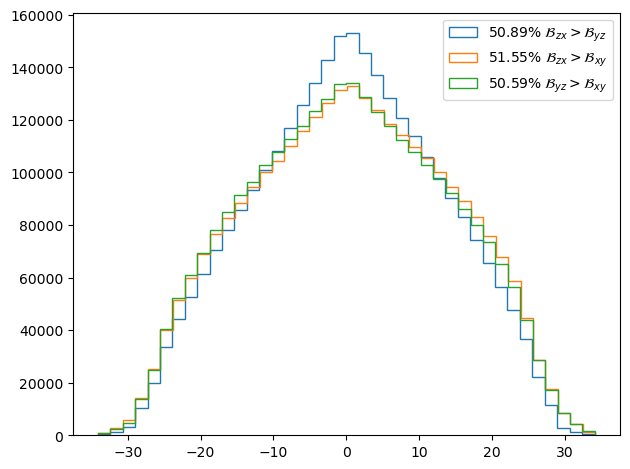

In [27]:
d = Bzx - Byz
plt.hist((Bzx - Byz), bins=40, histtype='step', label='{:.2f}% '.format(100*len(d[d > 0])/len(d)) + r'$\mathcal{B}_{zx} > \mathcal{B}_{yz}$')
d = Bzx - Bxy
plt.hist((Bzx - Bxy), bins=40, histtype='step', label='{:.2f}% '.format(100*len(d[d > 0])/len(d)) + r'$\mathcal{B}_{zx} > \mathcal{B}_{xy}$')
d = Byz - Bxy
plt.hist((Byz - Bxy), bins=40, histtype='step', label='{:.2f}% '.format(100*len(d[d > 0])/len(d)) + r'$\mathcal{B}_{yz} > \mathcal{B}_{xy}$')
plt.legend()
plt.tight_layout()
del(d)

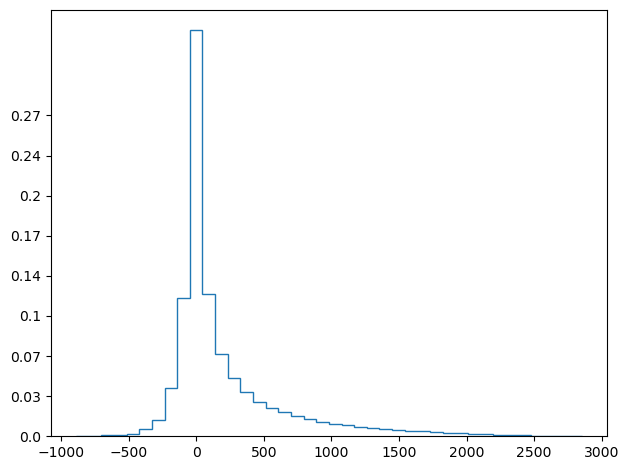

In [28]:
#plt.hist(Bxy+Byz+Bzx, bins=40, histtype='step', density=True)
#plt.hist(Bxy**2 + Byz**2 + Bzx**2, bins=40, histtype='step', density=True)
N = len(Bxy)
plt.hist(Bxy*Byz*Bzx, bins=40, histtype='step')
ticks = np.arange(0,900000,100000)
plt.yticks(ticks, labels = np.round(ticks/N,2))
plt.tight_layout()

### Data import: W$\pm$ boson rest frame directional cosines

In [29]:
xi_p = pd.DataFrame()
xi_m = pd.DataFrame()
xi_p["xi_p_x"] = load_evt('xi_xyz.npz', 'xi_p_x', rmv_evt)*GeV
xi_p["xi_p_y"] = load_evt('xi_xyz.npz', 'xi_p_y', rmv_evt)*GeV
xi_p["xi_p_z"] = load_evt('xi_xyz.npz', 'xi_p_z', rmv_evt)*GeV
xi_m["xi_m_x"] = load_evt('xi_xyz.npz', 'xi_m_x', rmv_evt)*GeV
xi_m["xi_m_y"] = load_evt('xi_xyz.npz', 'xi_m_y', rmv_evt)*GeV
xi_m["xi_m_z"] = load_evt('xi_xyz.npz', 'xi_m_z', rmv_evt)*GeV

Loaded xi_p_x from xi_xyz.npz collection  ['xi_p_x', 'xi_p_y', 'xi_p_z', 'xi_m_x', 'xi_m_y', 'xi_m_z'] rows:  2928859
Loaded xi_p_y from xi_xyz.npz collection  ['xi_p_x', 'xi_p_y', 'xi_p_z', 'xi_m_x', 'xi_m_y', 'xi_m_z'] rows:  2928859
Loaded xi_p_z from xi_xyz.npz collection  ['xi_p_x', 'xi_p_y', 'xi_p_z', 'xi_m_x', 'xi_m_y', 'xi_m_z'] rows:  2928859
Loaded xi_m_x from xi_xyz.npz collection  ['xi_p_x', 'xi_p_y', 'xi_p_z', 'xi_m_x', 'xi_m_y', 'xi_m_z'] rows:  2928859
Loaded xi_m_y from xi_xyz.npz collection  ['xi_p_x', 'xi_p_y', 'xi_p_z', 'xi_m_x', 'xi_m_y', 'xi_m_z'] rows:  2928859
Loaded xi_m_z from xi_xyz.npz collection  ['xi_p_x', 'xi_p_y', 'xi_p_z', 'xi_m_x', 'xi_m_y', 'xi_m_z'] rows:  2928859


### Axis pair of largest value

In [47]:
a = np.where(Bxy > Byz, 0, 1)
a = np.where(Bzx > a, 2, a)

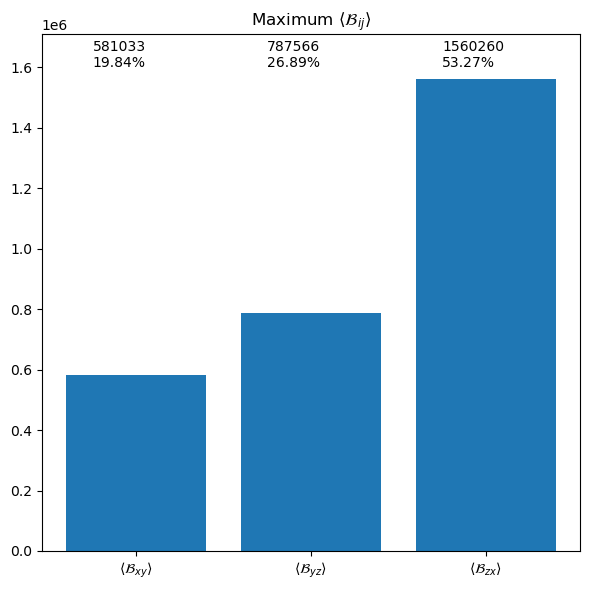

In [32]:
counts, _ = np.histogram(a, bins=[0,1,2,3])
fig = plt.figure(figsize=[6,6])
plt.bar([1,2,3], counts, align='center', tick_label=[r'$\langle \mathcal{B}_{xy} \rangle$',
                                                     r'$\langle \mathcal{B}_{yz} \rangle$',
                                                     r'$\langle \mathcal{B}_{zx} \rangle$'])
plt.ylim([0,1.71E6])
for i, j in enumerate(counts):
    p = j*100/len(a)
    plt.text(i+0.75, 1.6E6, "{}\n{:.2f}%".format(j,p))
plt.title(r"Maximum $\langle \mathcal{B}_{ij} \rangle$")
plt.tight_layout()
plt.savefig("MaxBij.png")

### Distribution of CGLMP elements

#### CGLMP expectation value on each axis pair

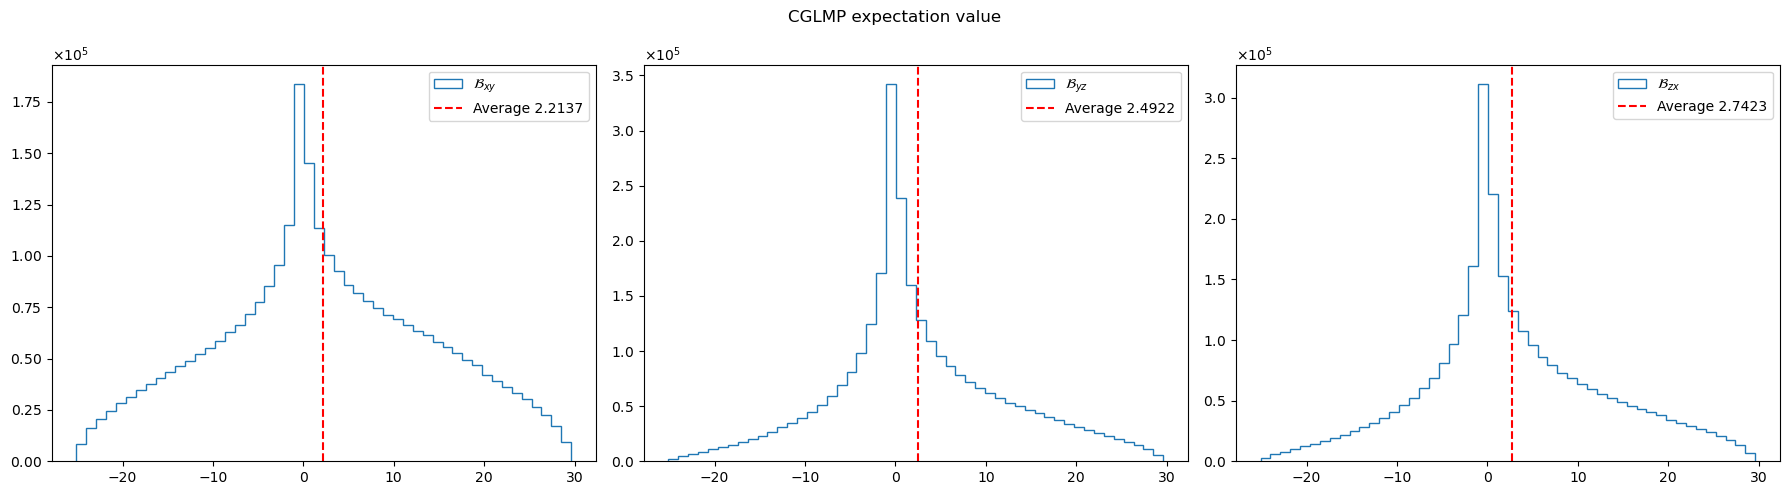

In [33]:
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
plt.suptitle("CGLMP expectation value")
ax = ax.flatten()
labels = [r'$\mathcal{B}_{xy}$',r'$\mathcal{B}_{yz}$',r'$\mathcal{B}_{zx}$']
for i, j in enumerate([Bxy, Byz, Bzx]):
    ax[i].hist(j, histtype='step', bins=50, label=labels[i])
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].axvline(np.mean(j), ls='dashed', c='r', label=f'Average {"%.4f"%np.mean(j)}')
    ax[i].legend()
plt.tight_layout()
plt.savefig("CGLMP.png")

#### Directional cosines
Cosine of angle between the lepton and each axis in the orthogonal coordinate system in the respective $W^\pm$ boson rest frame

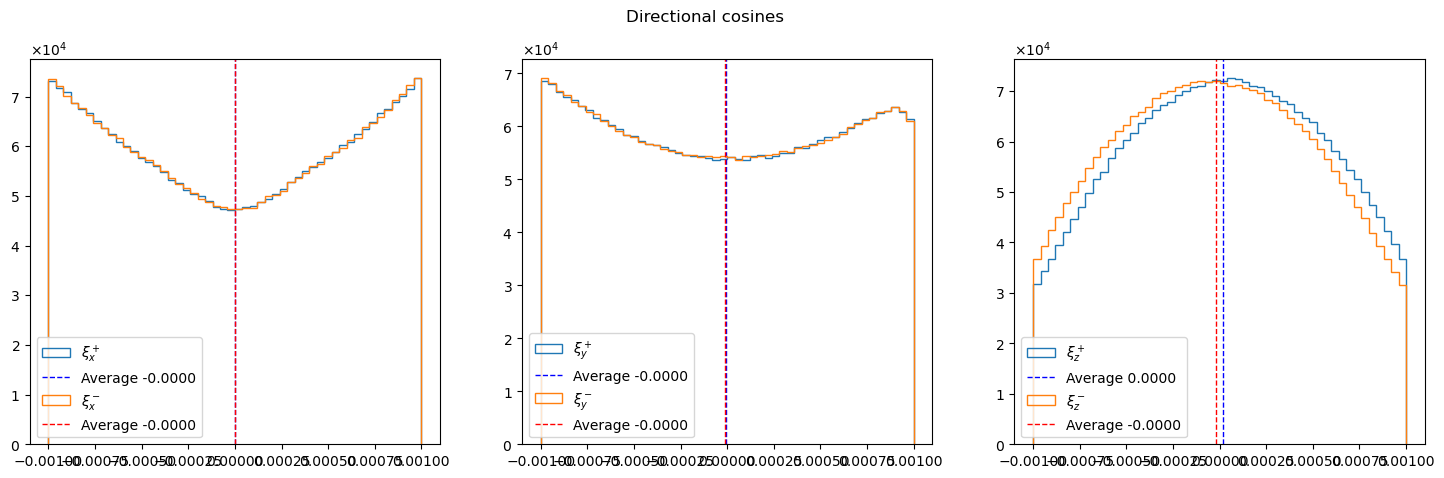

In [34]:
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
plt.suptitle("Directional cosines")
ax = ax.flatten()
labels = [r'$\xi_{x}^+$',r'$\xi_{y}^+$',r'$\xi_{z}^+$',r'$\xi_{x}^-$',r'$\xi_{y}^-$',r'$\xi_{z}^-$']
for i, j in enumerate([xi_p["xi_p_x"], xi_p["xi_p_y"], xi_p["xi_p_z"], xi_m["xi_m_x"], xi_m["xi_m_y"], xi_m["xi_m_z"]]):
    Col = 'b' if i < 3 else 'r'
    ax[i%3].hist(j, histtype='step', bins=50, label=labels[i])
    ax[i%3].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i%3].ticklabel_format(axis='x', style='sci', useMathText=True, scilimits=(-3,3))
    ax[i%3].axvline(np.mean(j), ls='dashed', c=Col, label=f'Average {"%.4f"%np.mean(j)}', lw=1)
    ax[i%3].legend()
plt.savefig("xi_1.png")

#### Distribution of quadratic and product terms in CGLMP formula

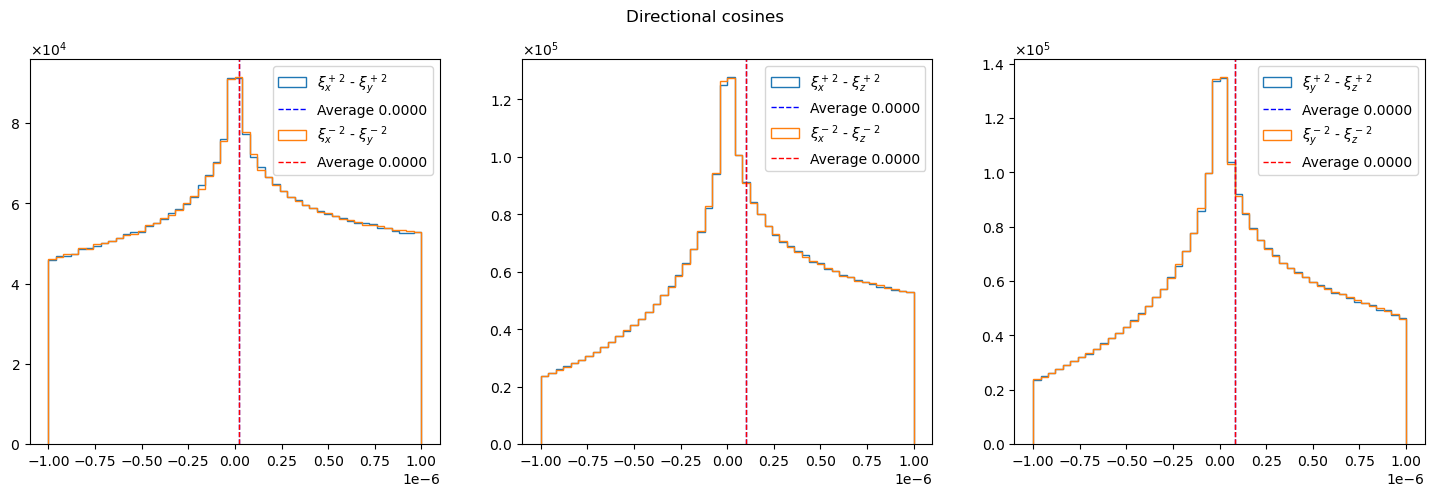

In [35]:
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
plt.suptitle("Directional cosines")
ax = ax.flatten()
labels = [r'${\xi_{x}^+}^2$',r'${\xi_{y}^+}^2$',r'${\xi_{z}^+}^2$',
          r'${\xi_{x}^-}^2$',r'${\xi_{y}^-}^2$',r'${\xi_{z}^-}^2$']

xi = [xi_p["xi_p_x"], xi_p["xi_p_y"], xi_p["xi_p_z"],
      xi_m["xi_m_x"], xi_m["xi_m_y"], xi_m["xi_m_z"]]
xi1 = [0, 0, 1, 3, 3, 4]
xi2 = [1, 2, 2, 4, 5, 5]
for i in range(6):
    Col = 'b' if i < 3 else 'r'
    ax[i%3].hist(xi[xi1[i]]**2 - xi[xi2[i]]**2, histtype='step', bins=50, label=f"{labels[xi1[i]]} - {labels[xi2[i]]}")
    ax[i%3].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i%3].axvline(np.mean(xi[xi1[i]]**2 - xi[xi2[i]]**2), ls='dashed', c=Col, label=f'Average {"%.4f"%np.mean(xi[xi1[i]]**2 - xi[xi2[i]]**2)}', lw=1)
    ax[i%3].legend(fontsize=10)
plt.savefig("xi_2.png")

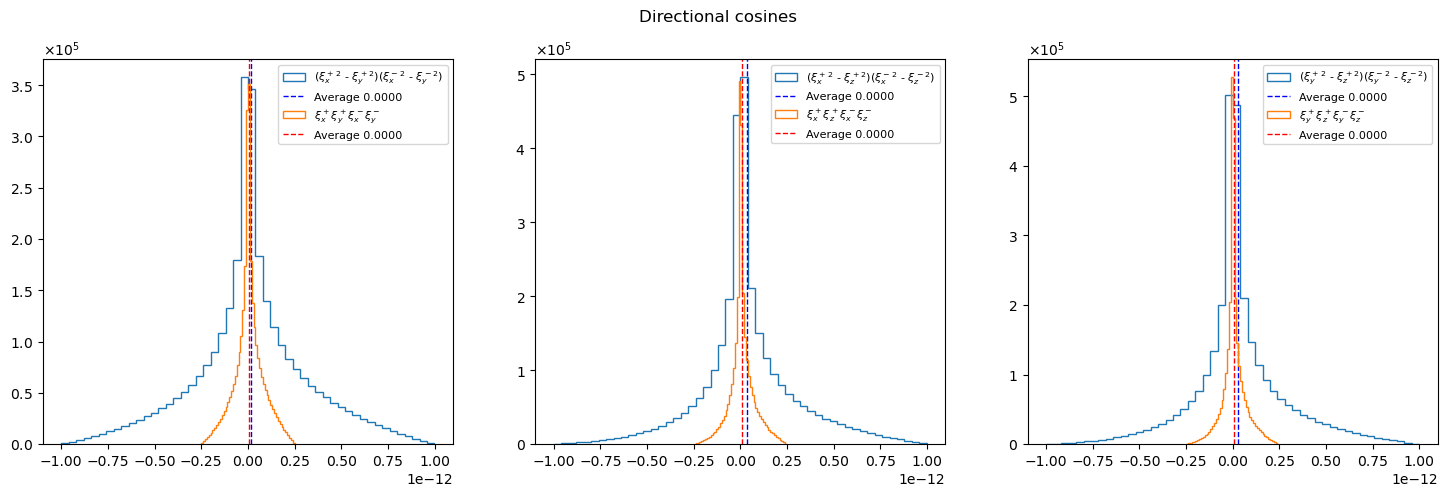

In [36]:
fig, ax = plt.subplots(ncols=3,nrows=1, figsize=(18,5))
plt.suptitle("Directional cosines")
ax = ax.flatten()
labels = [r'${\xi_{x}^+}^2$',r'${\xi_{y}^+}^2$',r'${\xi_{z}^+}^2$',
          r'${\xi_{x}^-}^2$',r'${\xi_{y}^-}^2$',r'${\xi_{z}^-}^2$']
Labels = [r'$\xi_{x}^+$',r'$\xi_{y}^+$',r'$\xi_{z}^+$',
          r'$\xi_{x}^-$',r'$\xi_{y}^-$',r'$\xi_{z}^-$']
xi = [xi_p["xi_p_x"], xi_p["xi_p_y"], xi_p["xi_p_z"],
      xi_m["xi_m_x"], xi_m["xi_m_y"], xi_m["xi_m_z"]]
xi1 = [0, 0, 1, 3, 3, 4]
xi2 = [1, 2, 2, 4, 5, 5]
for i in range(6):
    if i < 3:
        a = (xi[xi1[i]]**2 - xi[xi2[i]]**2)*(xi[xi1[i+3]]**2 - xi[xi2[i+3]]**2)
        ax[i%3].hist(a, histtype='step', bins=50,
                     label=f"({labels[xi1[i]]} - {labels[xi2[i]]})({labels[xi1[i+3]]} - {labels[xi2[i+3]]})")
        ax[i%3].axvline(np.mean(a), ls='dashed', c='b', label=f'Average {"%.4f"%np.mean(a)}', lw=1)
        a = (xi[xi1[i]]*xi[xi2[i]]*xi[xi1[i+3]]*xi[xi2[i+3]])
        ax[i%3].hist(a, histtype='step', bins=50,
                     label=f"{Labels[xi1[i]]}{Labels[xi2[i]]}{Labels[xi1[i+3]]}{Labels[xi2[i+3]]}")
        ax[i%3].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i%3].axvline(np.mean(a), ls='dashed', c='r', label=f'Average {"%.4f"%np.mean(a)}', lw=1)
        ax[i%3].legend(fontsize=8)
del(a)
plt.savefig("xi_3.png")

### Correlation plots between directional cosines $\xi^\pm_{x,y,z}$

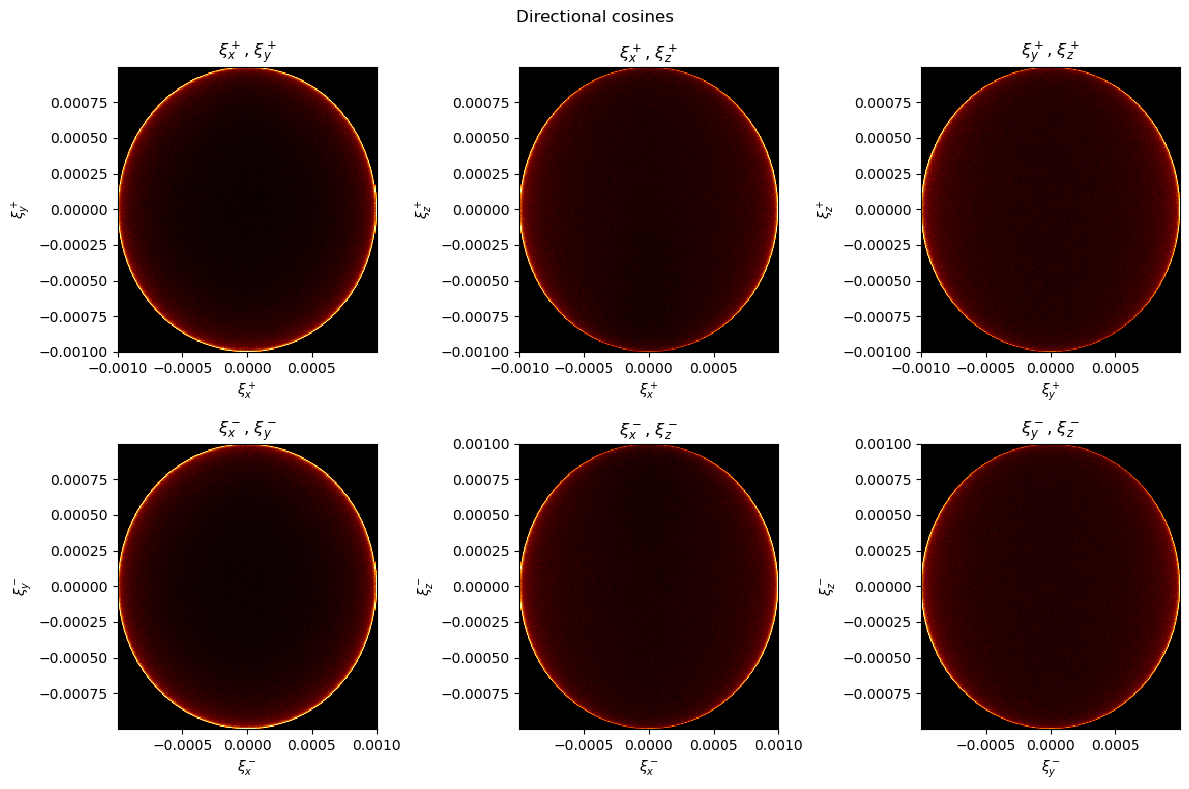

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
plt.suptitle("Directional cosines")
comp1 = [r'$\xi_{x}^+$', r'$\xi_{y}^+$', r'$\xi_{z}^+$']
comp2 = [r'$\xi_{x}^-$', r'$\xi_{y}^-$', r'$\xi_{z}^-$']

xp = ['xi_p_x', 'xi_p_y', 'xi_p_z']
xm = ['xi_m_x', 'xi_m_y', 'xi_m_z']

ax_x = [0,0,1]
ax_y = [1,2,2]
for i in range(3):
    ax[0,i].hist2d(xi_p[xp[ax_x[i]]], xi_p[xp[ax_y[i]]], bins=250, cmap='afmhot')
    ax[0,i].set_title(f"{comp1[ax_x[i]]}, {comp1[ax_y[i]]}")
    ax[0,i].set_ylabel(f"{comp1[ax_y[i]]}")
    ax[0,i].set_xlabel(f"{comp1[ax_x[i]]}")
    ax[1,i].hist2d(xi_m[xm[ax_x[i]]], xi_m[xm[ax_y[i]]], bins=250, cmap='afmhot')
    ax[1,i].set_title(f"{comp2[ax_x[i]]}, {comp2[ax_y[i]]}")
    ax[1,i].set_ylabel(f"{comp2[ax_y[i]]}")
    ax[1,i].set_xlabel(f"{comp2[ax_x[i]]}")
plt.tight_layout()
#plt.savefig("lep_mom_dist.png")


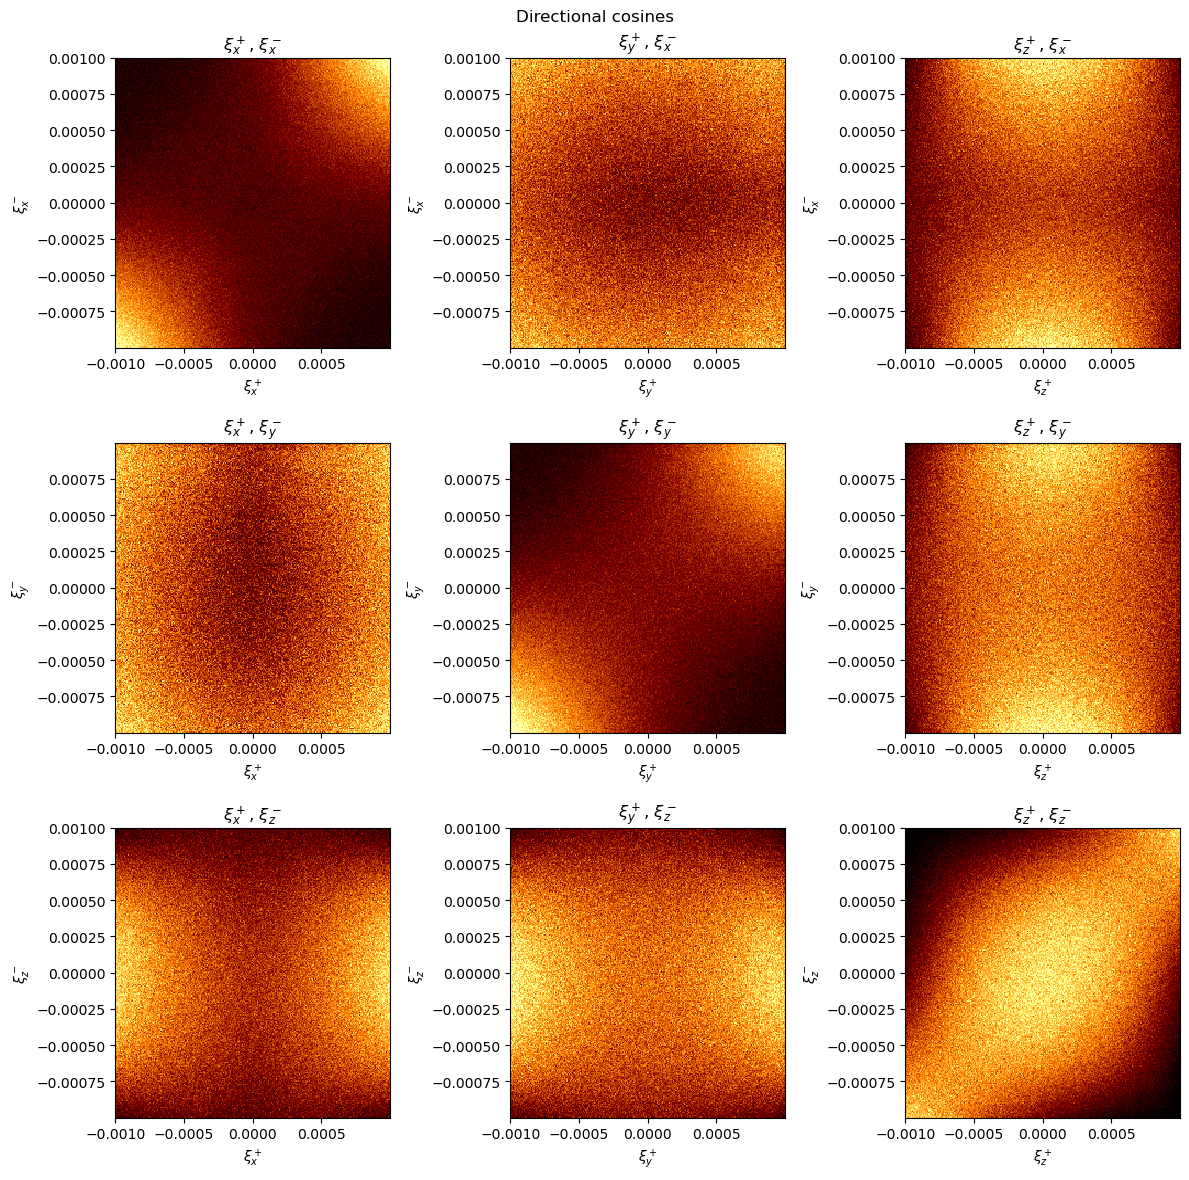

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
plt.suptitle("Directional cosines")

comp1 = [r'$\xi_{x}^+$', r'$\xi_{y}^+$', r'$\xi_{z}^+$']
comp2 = [r'$\xi_{x}^-$', r'$\xi_{y}^-$', r'$\xi_{z}^-$']

xp = ['xi_p_x', 'xi_p_y', 'xi_p_z']
xm = ['xi_m_x', 'xi_m_y', 'xi_m_z']


for i, a in enumerate(xm):
    for j, b in enumerate(xp):
#'''
        ax[i,j].set_title(f"{comp1[j]}, {comp2[i]}")
        ax[i,j].hist2d(xi_p[b], xi_m[a], bins=250, cmap='afmhot')
        ax[i,j].set_ylabel(f"{comp2[i]}")
        ax[i,j].set_xlabel(f"{comp1[j]}")
#'''
plt.tight_layout()


## Classification and Regression Models (Preprocessing)

In [39]:
lep_mom

lep_p_E   lep_p_px   lep_p_py    lep_p_pz     lep_m_E   lep_m_px  \
0         19.465703  -5.065763  16.360542   -9.250574   12.031222  11.081455   
1        131.817141   8.901175   2.966260  131.482766   66.401992 -13.096559   
2         94.193734  -3.040100  49.431305   80.123430   26.267500   7.589698   
3        165.226891   4.702402 -19.638676  163.988219   36.290188   0.038865   
4          6.403636   5.808921  -2.135702   -1.643704   32.603137  11.729594   
...             ...        ...        ...         ...         ...        ...   
2928854   22.480516  -4.717555 -16.589703   14.418352   49.250797 -12.090704   
2928855   99.478336 -39.512535 -10.980121   90.631805  122.645922 -10.679896   
2928856  146.673859  -4.429424 -31.802176  143.116078   91.911164 -18.621098   
2928857   93.748234  50.839535 -12.679508   77.738687   75.333094  13.880692   
2928858   17.937865   0.558829  16.618240   -6.728869   31.940250  12.075938   

          lep_m_py    lep_m_pz   lep_p_pt   lep_m_pt  lead_lep_pt  lead_lep_E  
0         2.673936   -3.847299  17.126859  11.399499    17.126859   19.465703  
1        14.755815   63.403242   9.382410  19.729519    19.729519   66.401992  
2         1.677931   25.090863  49.524702   7.772964    49.524702   94.193734  
3        20.284725   30.091441  20.193815  20.284762    20.284762   36.290188  
4        30.418752    0.263776   6.189086  32.601899    32.601899   32.603137  
...            ...         ...        ...        ...          ...         ...  
2928854   9.565715   46.775559  17.247422  15.417134    17.247422   22.480516  
2928855  15.682068  121.169445  41.009798  18.973335    41.009798   99.478336  
2928856 -13.887292   88.927273  32.109160  23.229338    32.109160  146.673859  
2928857   9.671063   73.408859  52.396834  16.917538    52.396834   93.748234  
2928858  17.681641  -23.700439  16.627634  21.411882    21.411882   31.940250  

[2928859 rows x 12 columns]

In [48]:
#lep_mom.insert(8, 'B_max', a)
lep_mom['B_max'] = a
np.unique(a)

array([0, 1, 2])

(-2000.0, 2000.0)

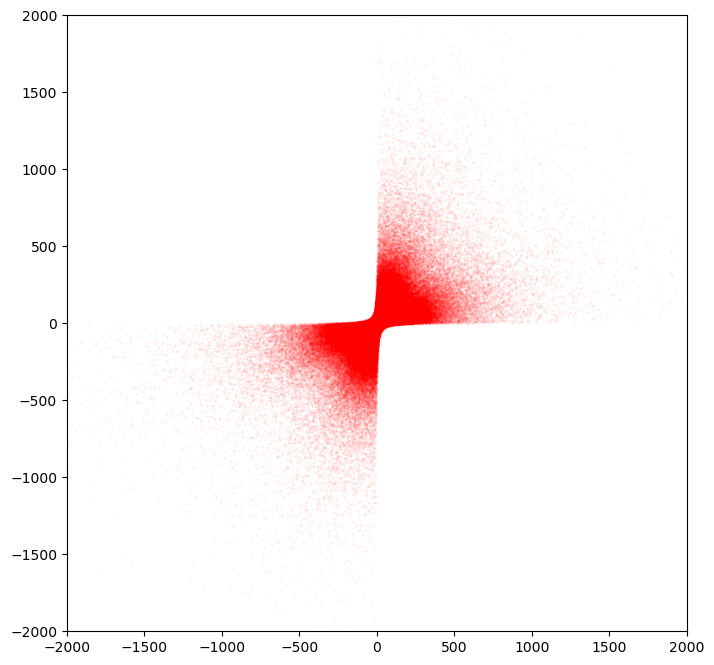

In [50]:
fig = plt.figure(figsize=(8,8))
plt.scatter(lep_mom['lep_p_pz'][lep_mom['B_max'] == 0], lep_mom['lep_m_pz'][lep_mom['B_max'] == 0], c='r', s=0.1, alpha=0.1)
#plt.scatter(lep_mom['lep_p_pz'][lep_mom['B_max'] == 1], lep_mom['lep_m_pz'][lep_mom['B_max'] == 1], c='g', s=0.1, alpha=0.1)
#plt.scatter(lep_mom['lep_p_pz'][lep_mom['B_max'] == 2], lep_mom['lep_m_pz'][lep_mom['B_max'] == 2], c='b', s=0.1, alpha=0.1)
plt.xlim(-2000,2000)
plt.ylim(-2000,2000)

In [51]:
nu_kin = pd.DataFrame()
PNu = load_p4('LpNu.npz',['nu_p_E','nu_p_px', 'nu_p_py','nu_p_pz'],rmv_evt)*GeV
MNu = load_p4('LmNu.npz',['nu_m_E','nu_m_px', 'nu_m_py','nu_m_pz'],rmv_evt)*GeV
nu_kin = pd.concat([PNu, MNu], axis=1)
del(PNu, MNu)
nu_kin

Loaded E, px, py, pz from LpNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859
Loaded E, px, py, pz from LmNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928859


nu_p_E    nu_p_px    nu_p_py     nu_p_pz      nu_m_E    nu_m_px  \
0         75.449547  -5.933027  30.212092   68.881516   46.680430  27.464617   
1        226.696359  59.309223 -25.300893  217.332734  384.335750  83.522359   
2          8.372312  -7.214337  -4.222511   -0.468329   66.342891   3.095675   
3         10.764710  -1.976395  -5.639073   -8.953977   30.333172 -17.860195   
4         71.970891 -19.597881 -10.960046   68.378430   82.460156  -2.266198   
...             ...        ...        ...         ...         ...        ...   
2928854   18.930295 -14.853719  -2.714729  -11.417238   36.779527  20.426375   
2928855  301.776094  17.287424 -42.560465  298.259219  151.308234 -15.025457   
2928856   77.725344  10.421646 -15.118907   75.525078  423.373219 -27.824840   
2928857   42.343359 -29.335346   7.877187   29.501654   56.019848  -9.054662   
2928858  245.994375  -1.252648 -27.696430 -244.427031   56.767867 -10.613506   

           nu_m_py     nu_m_pz  
0        28.449271   24.807184  
1       -10.934743  374.991219  
2       -48.527266   45.132035  
3       -11.609113   21.594980  
4       -15.764699   80.907453  
...            ...         ...  
2928854  12.611771  -27.864676  
2928855  -4.266326  150.499891  
2928856  43.943586  420.166188  
2928857  13.567734   53.592473  
2928858  -6.051271  -55.437590  

[2928859 rows x 8 columns]

In [52]:
mpx = load_evt('MET.npz', 'px', rmv_evt)*GeV
mpy = load_evt('MET.npz', 'py', rmv_evt)*GeV

#diNu_pz_est = np.load(filepath+'diNuPz_est.npy')
#diNu_pz_est = np.delete(diNuPz_est, rmv_evt)*GeV
diNu = pd.DataFrame(columns = ['E','px','py','pz'])
diNu['E' ] = (nu_kin['nu_p_E' ] + nu_kin['nu_m_E' ]).to_numpy()
diNu['px'] = (nu_kin['nu_p_px'] + nu_kin['nu_m_px']).to_numpy()
diNu['py'] = (nu_kin['nu_p_py'] + nu_kin['nu_m_py']).to_numpy()
diNu['pz'] = (nu_kin['nu_p_pz'] + nu_kin['nu_m_pz']).to_numpy()

Loaded px from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928859
Loaded py from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928859


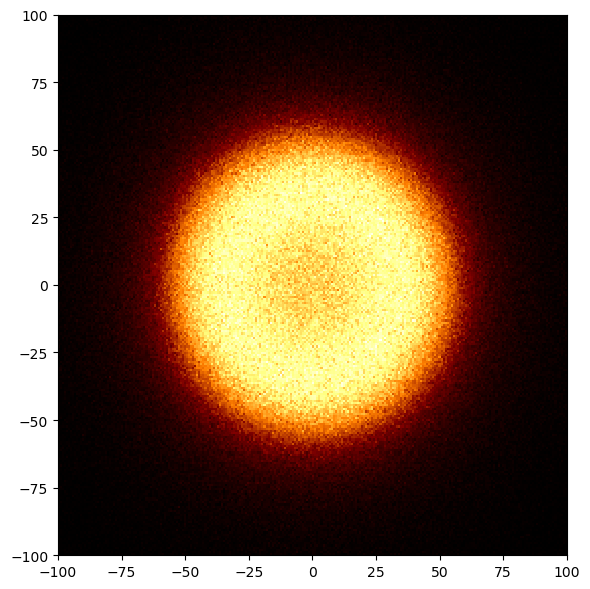

In [54]:
fig = plt.figure(figsize=(6,6))
plt.hist2d(mpx,mpy, bins=250, range=[[-100,100],[-100,100]], cmap='afmhot')
plt.tight_layout()

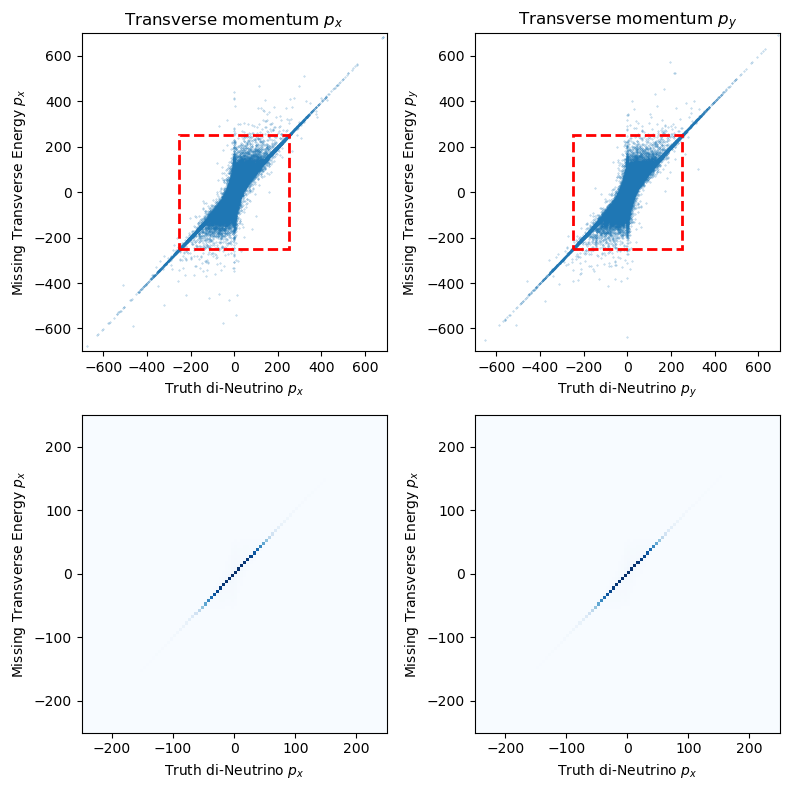

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax[0,0].set_title(r"Transverse momentum $p_x$")
ax[0,0].scatter(diNu['px'],mpx, s=0.1, alpha=0.5)#bins=250, range=[[-100,100],[-100,100]], cmap='afmhot')
ax[0,0].add_patch(Rectangle((-251,-251),502,502, lw=2, edgecolor='r', ls='dashed', facecolor='none'))
ax[0,0].set_xlabel(r'Truth di-Neutrino $p_x$')
ax[0,0].set_ylabel(r'Missing Transverse Energy $p_x$')
ax[0,1].set_title(r"Transverse momentum $p_y$")
ax[0,1].scatter(diNu['py'],mpy, s=0.1, alpha=0.5)#bins=250, range=[[-100,100],[-100,100]], cmap='afmhot')
ax[0,1].add_patch(Rectangle((-251,-251),502,502, lw=2, edgecolor='r', ls='dashed', facecolor='none'))
ax[0,1].set_xlabel(r'Truth di-Neutrino $p_y$')
ax[0,0].set_xlim(-700,700)
ax[0,0].set_ylim(-700,700)
ax[0,1].set_ylabel(r'Missing Transverse Energy $p_y$')
ax[0,1].set_xlim(-700,700)
ax[0,1].set_ylim(-700,700)
ax[1,0].hist2d(diNu['px'],mpx, bins=100, range=[[-250,250],[-250,250]], cmap='Blues')
ax[1,0].set_xlabel(r'Truth di-Neutrino $p_x$')
ax[1,0].set_ylabel(r'Missing Transverse Energy $p_x$')
ax[1,1].hist2d(diNu['py'],mpy, bins=100, range=[[-250,250],[-250,250]], cmap='Blues')
ax[1,1].set_xlabel(r'Truth di-Neutrino $p_x$')
ax[1,1].set_ylabel(r'Missing Transverse Energy $p_x$')
plt.tight_layout()

In [59]:
def rel_err(est,truth):
    return np.abs((est-truth)/truth)

Vrel_err = np.vectorize(rel_err)

In [ ]:
nu_px_err = np.where(Vrel_err(diNu_px,mpx) > 0.1, diNu_px, np.inf)
pt_px_err = np.where(Vrel_err(diNu_px,mpx) > 0.1, mpx, np.inf)
nu_py_err = np.where(Vrel_err(diNu_py,mpy) > 0.1, diNu_py, np.inf)
pt_py_err = np.where(Vrel_err(diNu_py,mpy) > 0.1, mpy, np.inf)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax[0,0].scatter(nu_px_err[nu_px_err < np.inf], pt_px_err[pt_px_err < np.inf], s=0.1, alpha=0.5)
ax[0,0].set_xlabel(r'Truth di-Neutrino $p_x$')
ax[0,0].set_xlim(-250,250)
ax[0,0].set_ylabel(r'Missing Transverse Energy $p_x$')
ax[0,0].set_ylim(-250,250)

ax[1,0].hist2d(nu_px_err[nu_px_err < np.inf], pt_px_err[pt_px_err < np.inf], bins=100, range=[[-250,250],[-250,250]], cmap='Blues')
ax[1,0].set_xlabel(r'Truth di-Neutrino $p_x$')
ax[0,1].set_xlim(-250,250)
ax[1,0].set_ylabel(r'Missing Transverse Energy $p_x$')
ax[0,1].set_ylim(-250,250)

ax[0,1].scatter(nu_py_err[nu_py_err < np.inf], pt_py_err[pt_py_err < np.inf], s=0.1, alpha=0.5)
ax[0,1].set_xlabel(r'Truth di-Neutrino $p_y$')
ax[0,1].set_ylabel(r'Missing Transverse Energy $p_y$')

ax[1,1].hist2d(nu_py_err[nu_py_err < np.inf], pt_py_err[pt_py_err < np.inf], bins=100, range=[[-250,250],[-250,250]], cmap='Blues')
ax[1,1].set_xlabel(r'Truth di-Neutrino $p_x$')
ax[1,1].set_ylabel(r'Missing Transverse Energy $p_x$')

plt.tight_layout()

## Baseline model: 
$\mathcal{B}_{*z}$ Regression  
Baseline model uses only *low level features*
* Features:
    * four-vector component ($E, p_x, p_y, p_z$)
        * alternate four-vector ($M, p_T, \eta, \phi$)
* Input particles (available four-vectors):
    * Positive/Negative charged leptons
        * leading/sub-leading lepton
    * Di-Lepton system
    * Missing Transverse momentum
        * $p_x$, $p_y$
        * $p_T$, $\phi$

[Visualize neural network](http://alexlenail.me/NN-SVG/index.html)

In [2]:
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
#print(tf.config.list_physical_devices())
from tensorflow import keras
from tensorflow.keras import layers
#from lbn import LBN, LBNLayer
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" #If the line below doesn't work, uncomment this line (make sure to comment the line below); it should help.
print(tf.__version__)

2023-08-15 18:00:40.200321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


In [64]:
MET = pd.DataFrame()
MET['mpx' ] = load_evt('MET.npz', 'px', rmv_evt)*GeV
MET['mpy' ] = load_evt('MET.npz', 'py', rmv_evt)*GeV
MET['mpt' ] = load_evt('MET.npz', 'pt', rmv_evt)*GeV
MET['mphi'] = load_evt('MET.npz', 'phi',rmv_evt)

Loaded px from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928859
Loaded py from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928859
Loaded pt from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928859
Loaded phi from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928859


In [14]:
lep_mom.head(5)

lep_p_E  lep_p_px   lep_p_py    lep_p_pz    lep_m_E   lep_m_px  \
0   19.465703 -5.065763  16.360542   -9.250574  12.031222  11.081455   
1  131.817141  8.901175   2.966260  131.482766  66.401992 -13.096559   
2   94.193734 -3.040100  49.431305   80.123430  26.267500   7.589698   
3  165.226891  4.702402 -19.638676  163.988219  36.290188   0.038865   
4    6.403636  5.808921  -2.135702   -1.643704  32.603137  11.729594   

    lep_m_py   lep_m_pz  
0   2.673936  -3.847299  
1  14.755815  63.403242  
2   1.677931  25.090863  
3  20.284725  30.091441  
4  30.418752   0.263776

In [65]:
len(Bzx)

2928859

In [19]:
import autokeras as ak
from sklearn.model_selection import train_test_split

In [ ]:
print(lep_mom.head(2))

#Initialize the structured data regressor
reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)
x_train, x_test, y_train, y_test = train_test_split(lep_mom[lepton_features],pd.DataFrame(Bzx),
                                                    train_size=0.8, test_size=0.2, random_state=42)

reg.fit(x_train,y_train, epochs=100)

In [ ]:
%%time
lepton_features = ['lep_p_E','lep_p_px','lep_p_py','lep_p_pz',
                   'lep_m_E','lep_m_px','lep_m_py','lep_m_pz']
np.random.seed(42)
sampling = np.random.choice(len(Bzx), replace=False, size=200000)

training = lep_mom[lepton_features].iloc[sampling,:]


lep_norm = tf.keras.layers.Normalization(axis=-1)
lep_norm.adapt(lep_mom[lepton_features])
'''
training = np.stack([lep_mom[lepton_features[0:4]].iloc[sampling,:],
                     lep_mom[lepton_features[4:8]].iloc[sampling,:]],axis=1)
                     
training = np.stack([mpx[sampling],
                     mpy[sampling],
                     mpt[sampling],
                     mphi[sampling]],axis=-1)
'''
#'''
input_norm = tf.keras.layers.Normalization(axis=-1)
input_norm.adapt(np.stack([lep_mom[lepton_features[0:4]],
                           lep_mom[lepton_features[4:8]]],axis=1))

Bzx_norm = tf.keras.layers.Normalization(axis=None)
Bzx_norm.adapt(Bzx)

Bzx_invert = tf.keras.layers.Normalization(axis=None, invert=True)
Bzx_invert.adapt(Bzx)


Bzx_train = Bzx_norm(Bzx[sampling]).numpy()
#training = input_norm(training).numpy()
training = lep_norm(training).numpy()
train, test, Bzx_train, Bzx_test = train_test_split(training, Bzx_train, train_size=0.8, test_size=0.2, random_state=42)

#'''
#train, test, Bzx_train, Bzx_test = train_test_split(training, Bzx[sampling], train_size=0.8, test_size=0.2, random_state=42)
test, valid, Bzx_test, Bzx_valid = train_test_split(test, Bzx_test,train_size=0.8, test_size=0.2, random_state=42)
print('Training data shape: '  , train.shape)
print('Testing data shape: '   , test.shape)
print('Validation data shape: ', valid.shape)

### Normalization Layers

NameError: name 'Bzx_train' is not defined

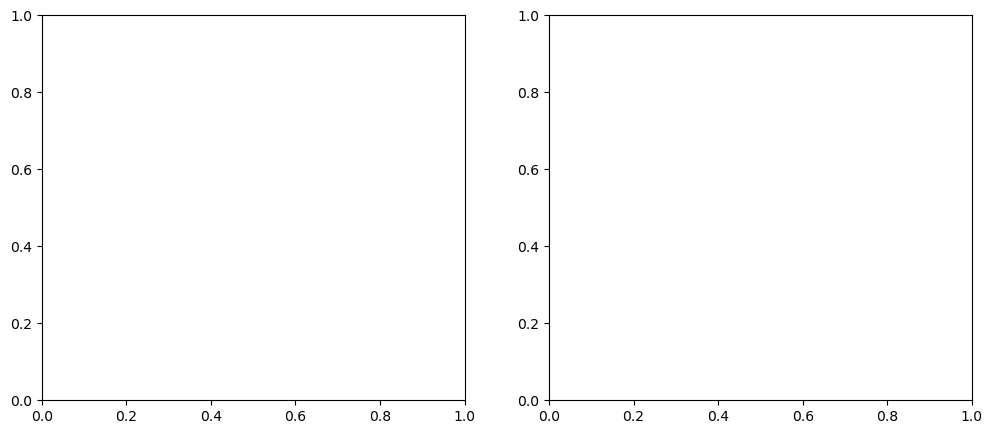

In [62]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))
ax = ax.flatten()
ax[0].hist(Bzx_train, bins=50, histtype='step')
ax[0].set_title(r'Normalized $\mathcal{B}_{zx}$ Random sample ($N=10^5$)'+
          '\nmean: {:.6f} variance: {:.4f}'.format(np.mean(Bzx_train),np.var(Bzx_train)))
ax[0].ticklabel_format(axis='y',style='scientific', scilimits=[-4,4], useMathText=True)

Bzx_inv = Bzx_invert(Bzx_train).numpy()
ax[1].hist(Bzx_inv, bins=50, histtype='step')
ax[1].ticklabel_format(axis='y',style='scientific', scilimits=[-4,4], useMathText=True)
ax[1].set_title(r'Inverted normalized $\mathcal{B}_{zx}$ Random sample'+
          '\nmean: {:.6f} variance: {:.4f}'.format(np.mean(Bzx_inv),np.var(Bzx_inv)))
plt.tight_layout()

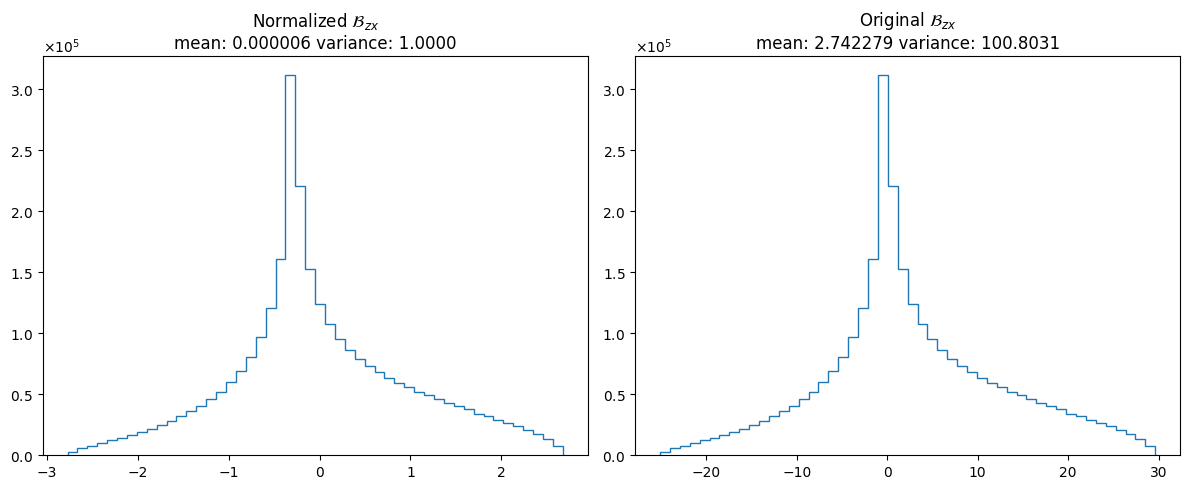

In [191]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))
ax = ax.flatten()

Bzx_adapt = Bzx_norm(Bzx).numpy()
ax[0].hist(Bzx_adapt, bins=50, histtype='step')
ax[0].ticklabel_format(axis='y',style='scientific', scilimits=[-4,4], useMathText=True)
ax[0].set_title(r'Normalized $\mathcal{B}_{zx}$'+
          '\nmean: {:.6f} variance: {:.4f}'.format(np.mean(Bzx_adapt),np.var(Bzx_adapt)))

ax[1].hist(Bzx, bins=50, histtype='step')
ax[1].set_title(r'Original $\mathcal{B}_{zx}$'+
          '\nmean: {:.6f} variance: {:.4f}'.format(np.mean(Bzx),np.var(Bzx)))
ax[1].ticklabel_format(axis='y',style='scientific', scilimits=[-4,4], useMathText=True)

plt.tight_layout()

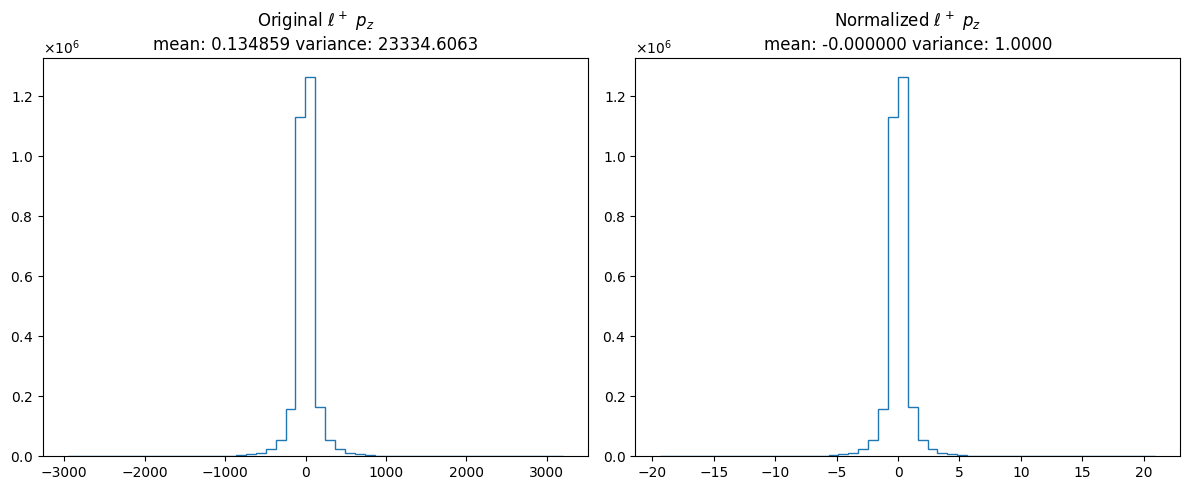

In [193]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))
ax = ax.flatten()
ax[0].hist(lep_mom['lep_p_pz'], bins=50, histtype='step')
ax[0].set_title(r'Original $\ell^+$ $p_z$'+
          '\nmean: {:.6f} variance: {:.4f}'.format(np.mean(lep_mom['lep_p_pz']),np.var(lep_mom['lep_p_pz'])))
ax[0].ticklabel_format(axis='y',style='scientific', scilimits=[-4,4], useMathText=True)
lep_p_pz_adapt = lep_norm(lep_mom[lepton_features]).numpy()
lep_p_pz_adapt = lep_p_pz_adapt[:,3]
ax[1].hist(lep_p_pz_adapt, bins=50, histtype='step')
ax[1].ticklabel_format(axis='y',style='scientific', scilimits=[-4,4], useMathText=True)
ax[1].set_title(r'Normalized $\ell^+$ $p_z$'+
          '\nmean: {:.6f} variance: {:.4f}'.format(np.mean(lep_p_pz_adapt),np.var(lep_p_pz_adapt)))
plt.tight_layout()

### Model define

In [215]:
%%time
#model = tf.keras.Sequential([normalizer,
#in_shape = (2,4) #2 particles, 4 vector components
in_shape = 8 # 2x4 four-vector components
N_combinations = 8 # number of composite particles/rest frames
#LBNLayer(input_shape, N_combinations, boost_mode=LBN.PAIRS)
model = tf.keras.Sequential([layers.InputLayer(input_shape=(in_shape,),batch_size=32),
                             layers.Dense(units=128, activation='relu'), 
                             layers.Dense(units=128, activation='relu'),
                             layers.Dense(1, activation='linear')])

model.summary()
opti = tf.keras.optimizers.Adam(learning_rate=1e-05,beta_1=0.9,beta_2=0.999,epsilon=1e-02)
model.compile(optimizer=opti, loss='mean_squared_error')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (32, 128)                 1152      
                                                                 
 dense_39 (Dense)            (32, 128)                 16512     
                                                                 
 dense_40 (Dense)            (32, 1)                   129       
                                                                 
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________
CPU times: user 35.6 ms, sys: 0 ns, total: 35.6 ms
Wall time: 33.9 ms


In [217]:
%%time
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=0)
weights = tf.keras.callbacks.ModelCheckpoint('weights_epoch_0-500.hdf5', monitor='val_loss', save_best_only=False)
history = model.fit(train, Bzx_train, validation_data=(valid, Bzx_valid), epochs=500, callbacks= weights)

Epoch 1/500
5000/5000 [==============================] - 8s 1ms/step - loss: 1.0010 - val_loss: 0.9648
Epoch 2/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.9713 - val_loss: 0.9474
Epoch 3/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.9577 - val_loss: 0.9375
Epoch 4/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.9495 - val_loss: 0.9313
Epoch 5/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.9442 - val_loss: 0.9279
Epoch 6/500
5000/5000 [==============================] - 9s 2ms/step - loss: 0.9407 - val_loss: 0.9248
Epoch 7/500
5000/5000 [==============================] - 9s 2ms/step - loss: 0.9382 - val_loss: 0.9229
Epoch 8/500
5000/5000 [==============================] - 10s 2ms/step - loss: 0.9363 - val_loss: 0.9214
Epoch 9/500
5000/5000 [==============================] - 10s 2ms/step - loss: 0.9347 - val_loss: 0.9209
Epoch 10/500
5000/5000 [==============================] - 9s 2ms/step -

In [218]:
Bzx_predict = model.predict(test)

1000/1000 [==============================] - 1s 1ms/step


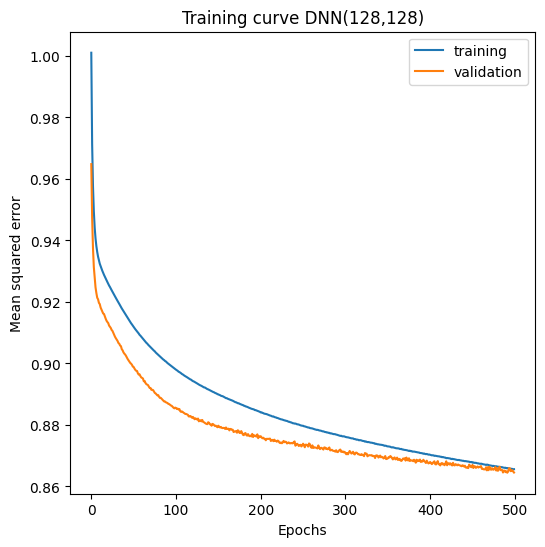

In [222]:
fig = plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'],label = 'validation')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')
plt.title('Training curve DNN(128,128)')
plt.legend()
plt.savefig('2lP4_DNN-128-128_500_loss.png')

### Plots

In [ ]:
'''
With LBNLayer
Without Normalization layer
Hidden layer activation function: relu
Changed from using mean squared error to mean absolute error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nLBN(8)+DNN(64,64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With LBNLayer
Without Normalization layer
Hidden layer activation function: relu
Changed from using mean squared error to mean absolute error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nLBN(8)+DNN(64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With LBNLayer
Without Normalization layer
Hidden layer activation function: linear
Changed from using mean squared error to mean absolute error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nLBN(8)+DNN(64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With LBNLayer
Without Normalization layer
Hidden layer activation function: linear
Changed from using mean absolute error to mean squared error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nLBN(8)+DNN(64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and regular labels
Changed from using mean absolute error to mean squared error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and regular labels
Changed from using mean absolute error to mean squared error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and regular labels
Changed from using mean absolute error to mean squared error
Using L2 kernel regularizer on hidden layers
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
Changed from using mean absolute error to mean squared error
Using L2 kernel regularizer on hidden layers
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
Changed from using mean absolute error to mean squared error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
Changed from using mean absolute error to mean squared error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(32,32) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,32,16) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(32,32,32) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(32,32) '+r' $N=1 \times 10^5$')
plt.tight_layout()

In [ ]:
'''
With Normalization layer
normalized input and labels
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64) '+r' $N=5 \times 10^5$')
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$p_T^x$ $p_T^y$ $p_T$ $p_T^\phi$'+'\nDNN(64,64) '+r' $N=5 \times 10^5$')
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$p_T$ $p_T^\phi$'+'\nDNN(64,64) '+r' $N=5 \times 10^5$')
plt.tight_layout()

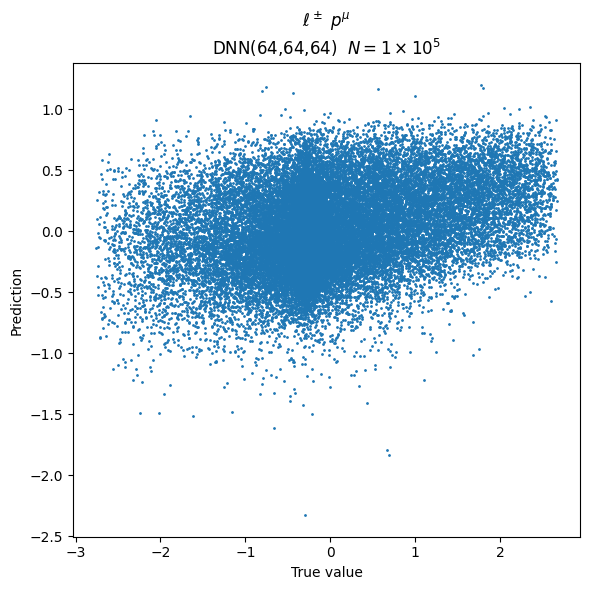

In [219]:
'''
2 four vectors, 8 columns
Without LBNLayer
With Normalization layer
Hidden layer activation function: relu
loss function: mean absolute error
'''
fig = plt.figure(figsize=(6,6))
plt.scatter(Bzx_test, Bzx_predict, s=1)
plt.ylabel('Prediction')
plt.xlabel('True value')
plt.title(r'$\ell^\pm$ $p^\mu$'+'\nDNN(64,64,64) '+r' $N=1 \times 10^5$')
plt.tight_layout()